<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New classfacation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('/content/preprocessed1.csv')


print(data)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  \
0      2    1              1          2            0          0      0   
1      2    0              2          0            1          0      0   
2      2    1              1          1            0          0      1   
3      2    0              0          2            2          0      1   
4      0    1              2          0            1          0      1   
..   ...  ...            ...        ...          ...        ...    ...   
913    2    1              3          3            0          0      2   
914    1    1              0          0            1          1      2   
915    0    1              0          1            1          0      1   
916    0    0              1          1            2          0      0   
917    2    1              2          2            1          0      0   

     ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0                 0        1         2             0  
1


Information Gain (Entropy):

Splitting Data into: 70% Training and 30% Test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1
)

# Initialize the Decision Tree Classifier using entropy as criterion
classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predict labels for the test dataset
y_pred = classifier.predict(X_test)

[[ 84  25]
 [ 40 127]]


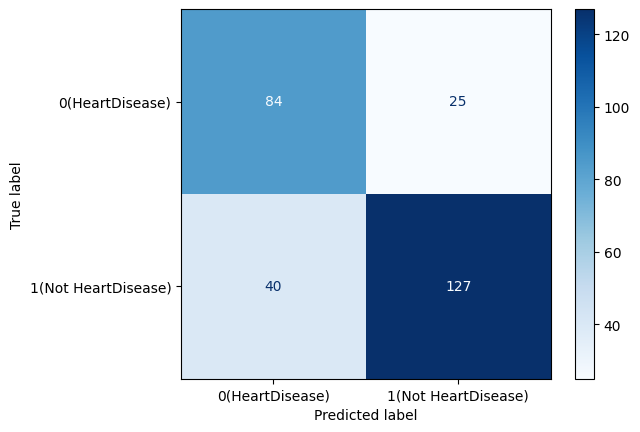

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define custom class labels for display
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Create the ConfusionMatrixDisplay with the custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[class_labels[0], class_labels[1]])

# Plot the confusion matrix using the 'Blues' colormap
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 84):** 84 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 25):** 25 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 40):** 40 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 127):** 127 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model correctly identified 84 patients with HeartDisease and 127 patients without HeartDisease.

However, it misclassified 25 HeartDisease patients as healthy and incorrectly predicted 40 healthy patients as having HeartDisease.

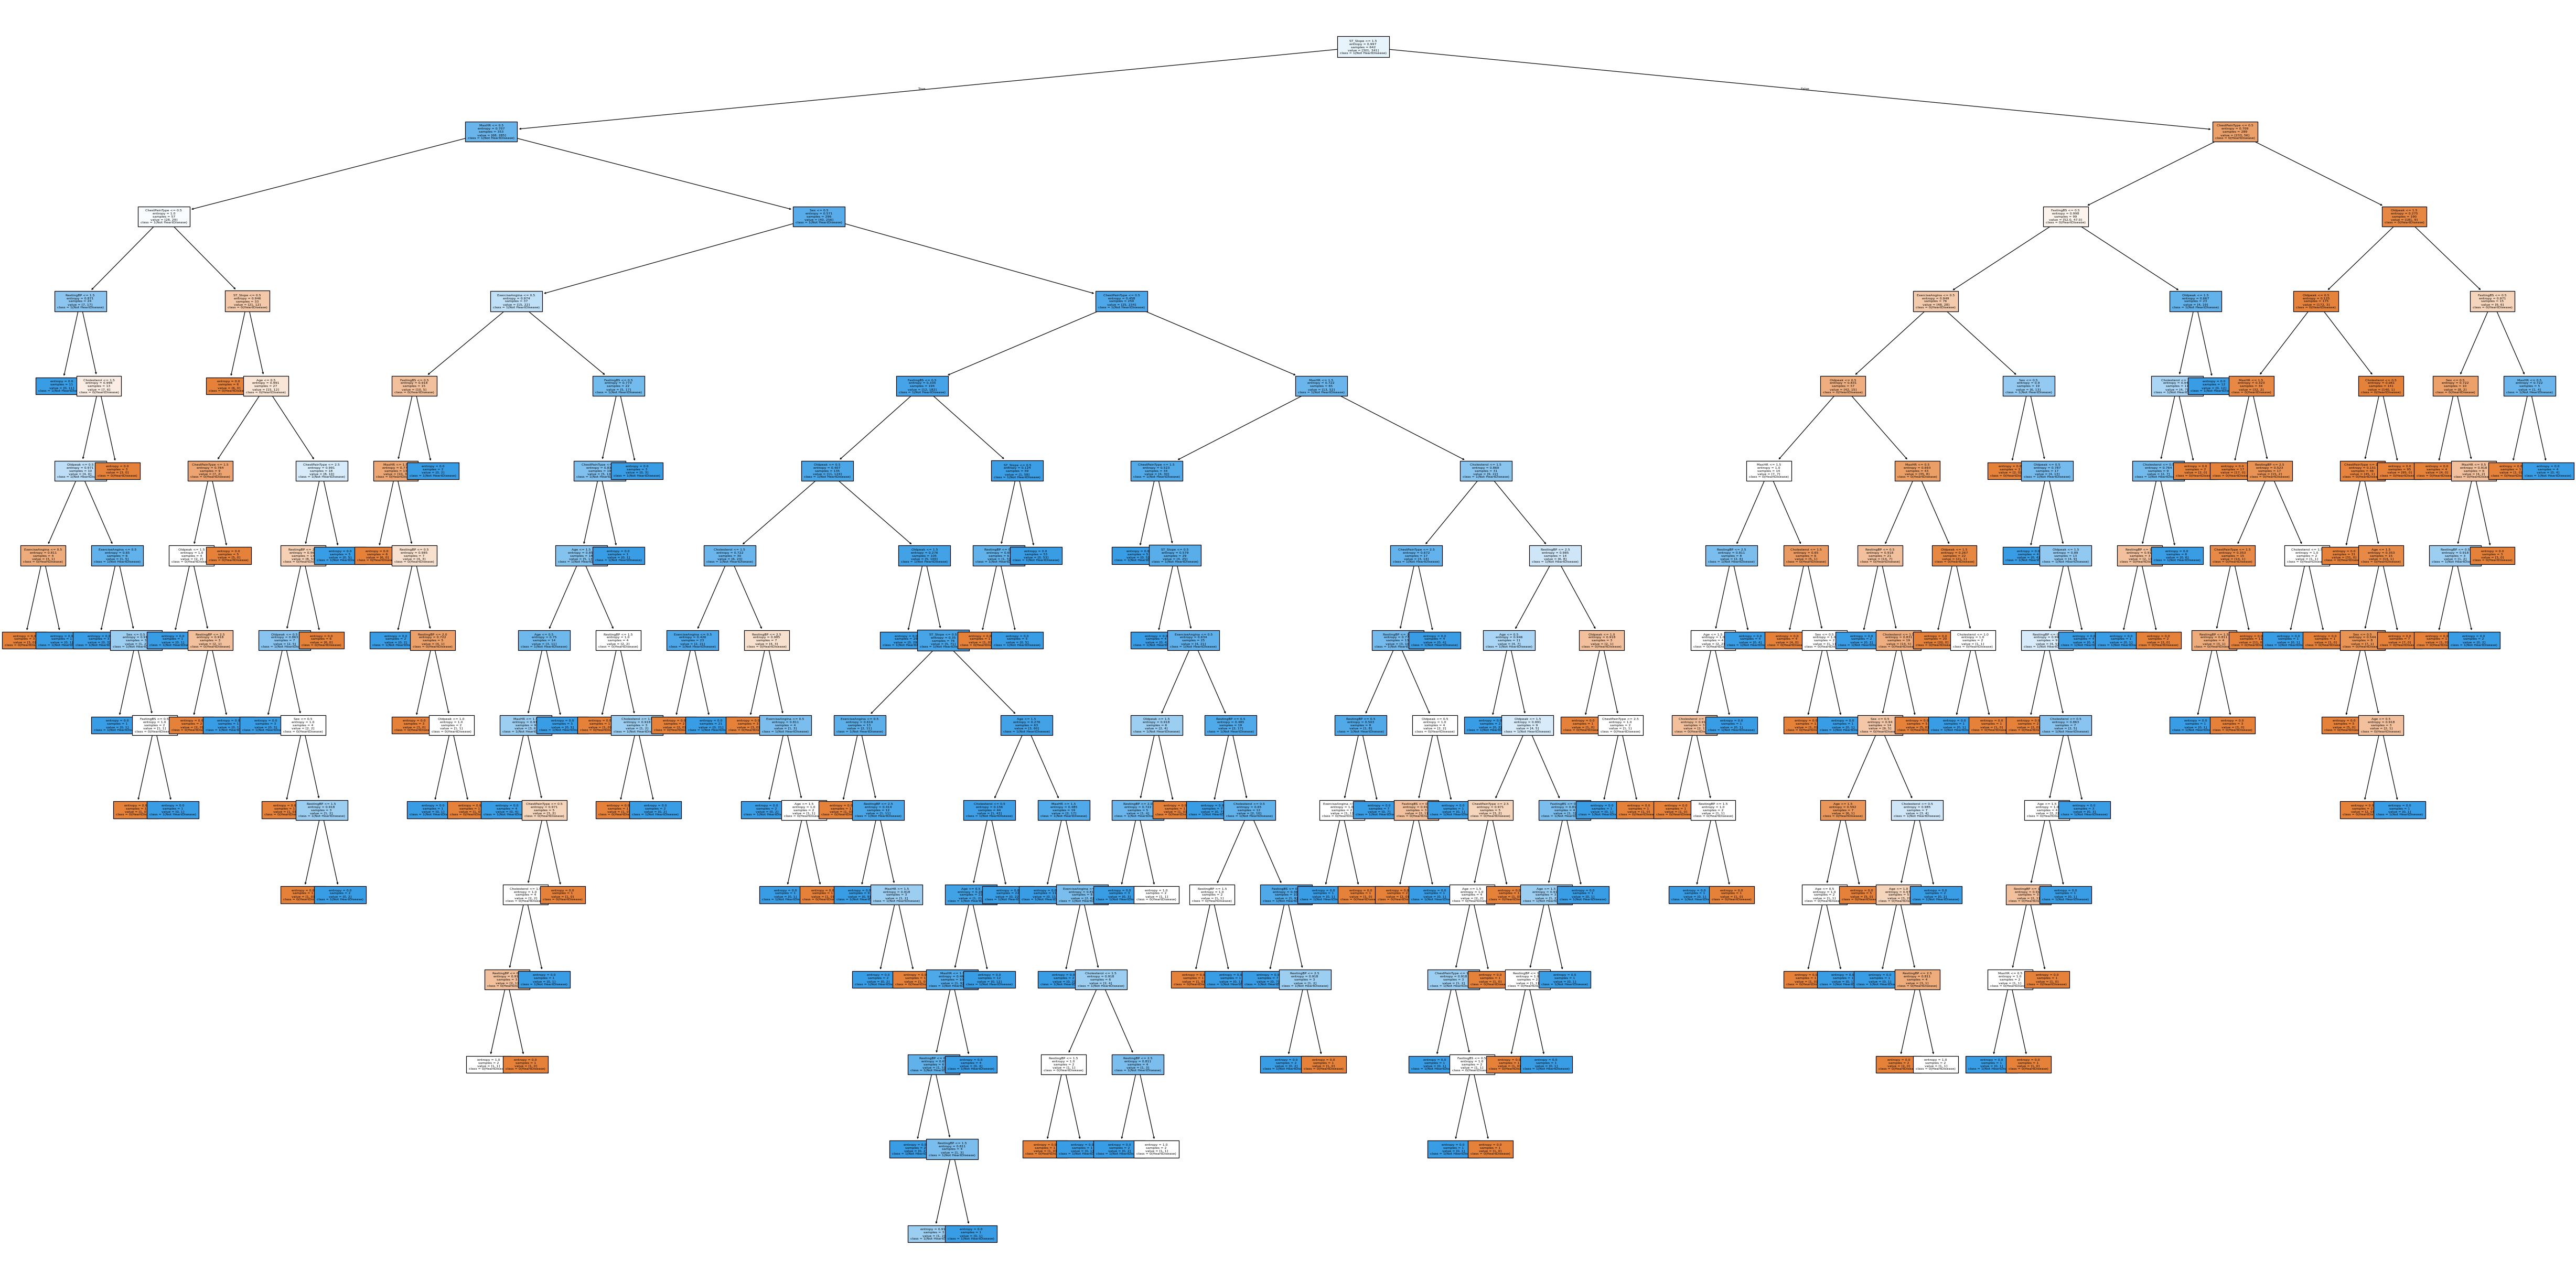

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(70, 35), dpi=90)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Plot the decision tree using the trained classifier 'classifier' # Changed clf to classifier
tree.plot_tree(
    classifier, # Changed clf to classifier
    feature_names=fn,
    class_names=[class_labels[0], class_labels[1]],
    filled=True,
    fontsize=5,    # big text = bigger box
    ax=ax
)

# Display the plot
plt.show()

**Initial Split**

The decision tree begins with a root node that selects the feature with the highest Information Gain (Entropy). This split produces the greatest reduction in uncertainty and separates the dataset into two major groups with different class distributions.


**Intermediate Nodes**

After the first split, the tree continues dividing the data using features like ChestPainType, ExerciseAngina, and Oldpeak. These features appear often because they help the model refine the risk level of each patient. The deeper splits use additional attributes to improve accuracy, but they contribute less than the main ones at the top.


**Branching Pathways**

The branching structure includes both short and long paths, reflecting simple cases and more complex patterns. The wide and deep layout indicates that the dataset contains varied feature interactions that require multiple decision steps.


**Leaf Nodes**

At the bottom of the tree, each leaf node represents the final predicted class. Orange leaves correspond to HeartDisease, while blue leaves represent Not HeartDisease. Patients reach these leaves based on the combination of feature conditions above them. Many leaves are pure, showing that the tree confidently separates high-risk and low-risk patients.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm2)

# Calculate Accuracy and Error Rate
accuracy = metrics.accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = cm2[1, 1]
TN = cm2[0, 0]
FP = cm2[0, 1]
FN = cm2[1, 0]

# Compute Sensitivity (Recall), Specificity, and Precision
sensitivity = TP / (TP + FN)   # Recall: TP / (TP + FN)
specificity = TN / (TN + FP)
precision   = TP / (TP + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)


Confusion matrix:
 [[ 84  25]
 [ 40 127]]
Accuracy: 0.7644927536231884
Error Rate: 0.23550724637681164
Sensitivity: 0.7604790419161677
Specificity: 0.7706422018348624
Precision: 0.8355263157894737


**Accuracy:**

Indicates the percentage of total predictions the model classified correctly. The model reached an accuracy of 76.44%, meaning it correctly predicted about 76% of all cases.

**Error Rate:**

Represents the percentage of predictions that were incorrect. The error rate is approximately 23.55%.

**Sensitivity (Recall):**

Shows the model’s effectiveness in identifying true cases of heart disease. The sensitivity is 76.04%, suggesting the model successfully captures most positive (heart disease) cases.

**Specificity:**

Measures how accurately the model identifies individuals who do not have heart disease. With a specificity of 77.06%, the model performs strongly in recognizing true negative cases.

**Precision:**

Reflects how many of the model’s positive predictions were actually correct. The precision is 83.55%, indicating that predictions labeled as heart disease are highly reliable.



**Outcomes:**

- The model delivers a solid  accuracy of (76.44%).

- With a sensitivity of 76.04%, it is effective at identifying individuals who truly have heart disease.

- Its specificity of 77.06% demonstrates strong ability to correctly recognize those without the condition.

- The high precision (83.55%) shows that when the model predicts heart disease, it is usually correct.


Splitting Data into: 60% Training and 40% Test:

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data: 60% for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

# Initialize the Decision Tree classifier using Information Gain (entropy)
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train the classifier on the training data
clf3.fit(X_train, y_train)

# Predict labels for the test set
y_pred = clf3.predict(X_test)

Confusion Matrix:
 [[121  32]
 [ 51 164]]


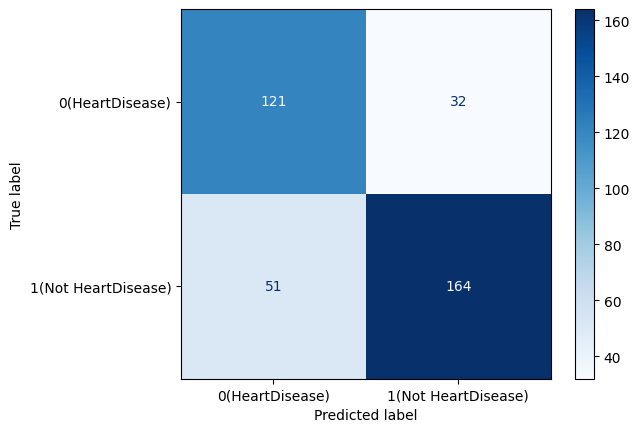

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm3)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Create and plot the confusion matrix display using the 'Blues' colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 121):** 121 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 32):** 32 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 51):** 51 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 164):** 164 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model correctly identified 121 patients with HeartDisease and 164 patients without HeartDisease.

However, it misclassified 32 HeartDisease patients as healthy and incorrectly predicted 51 healthy patients as having HeartDisease.

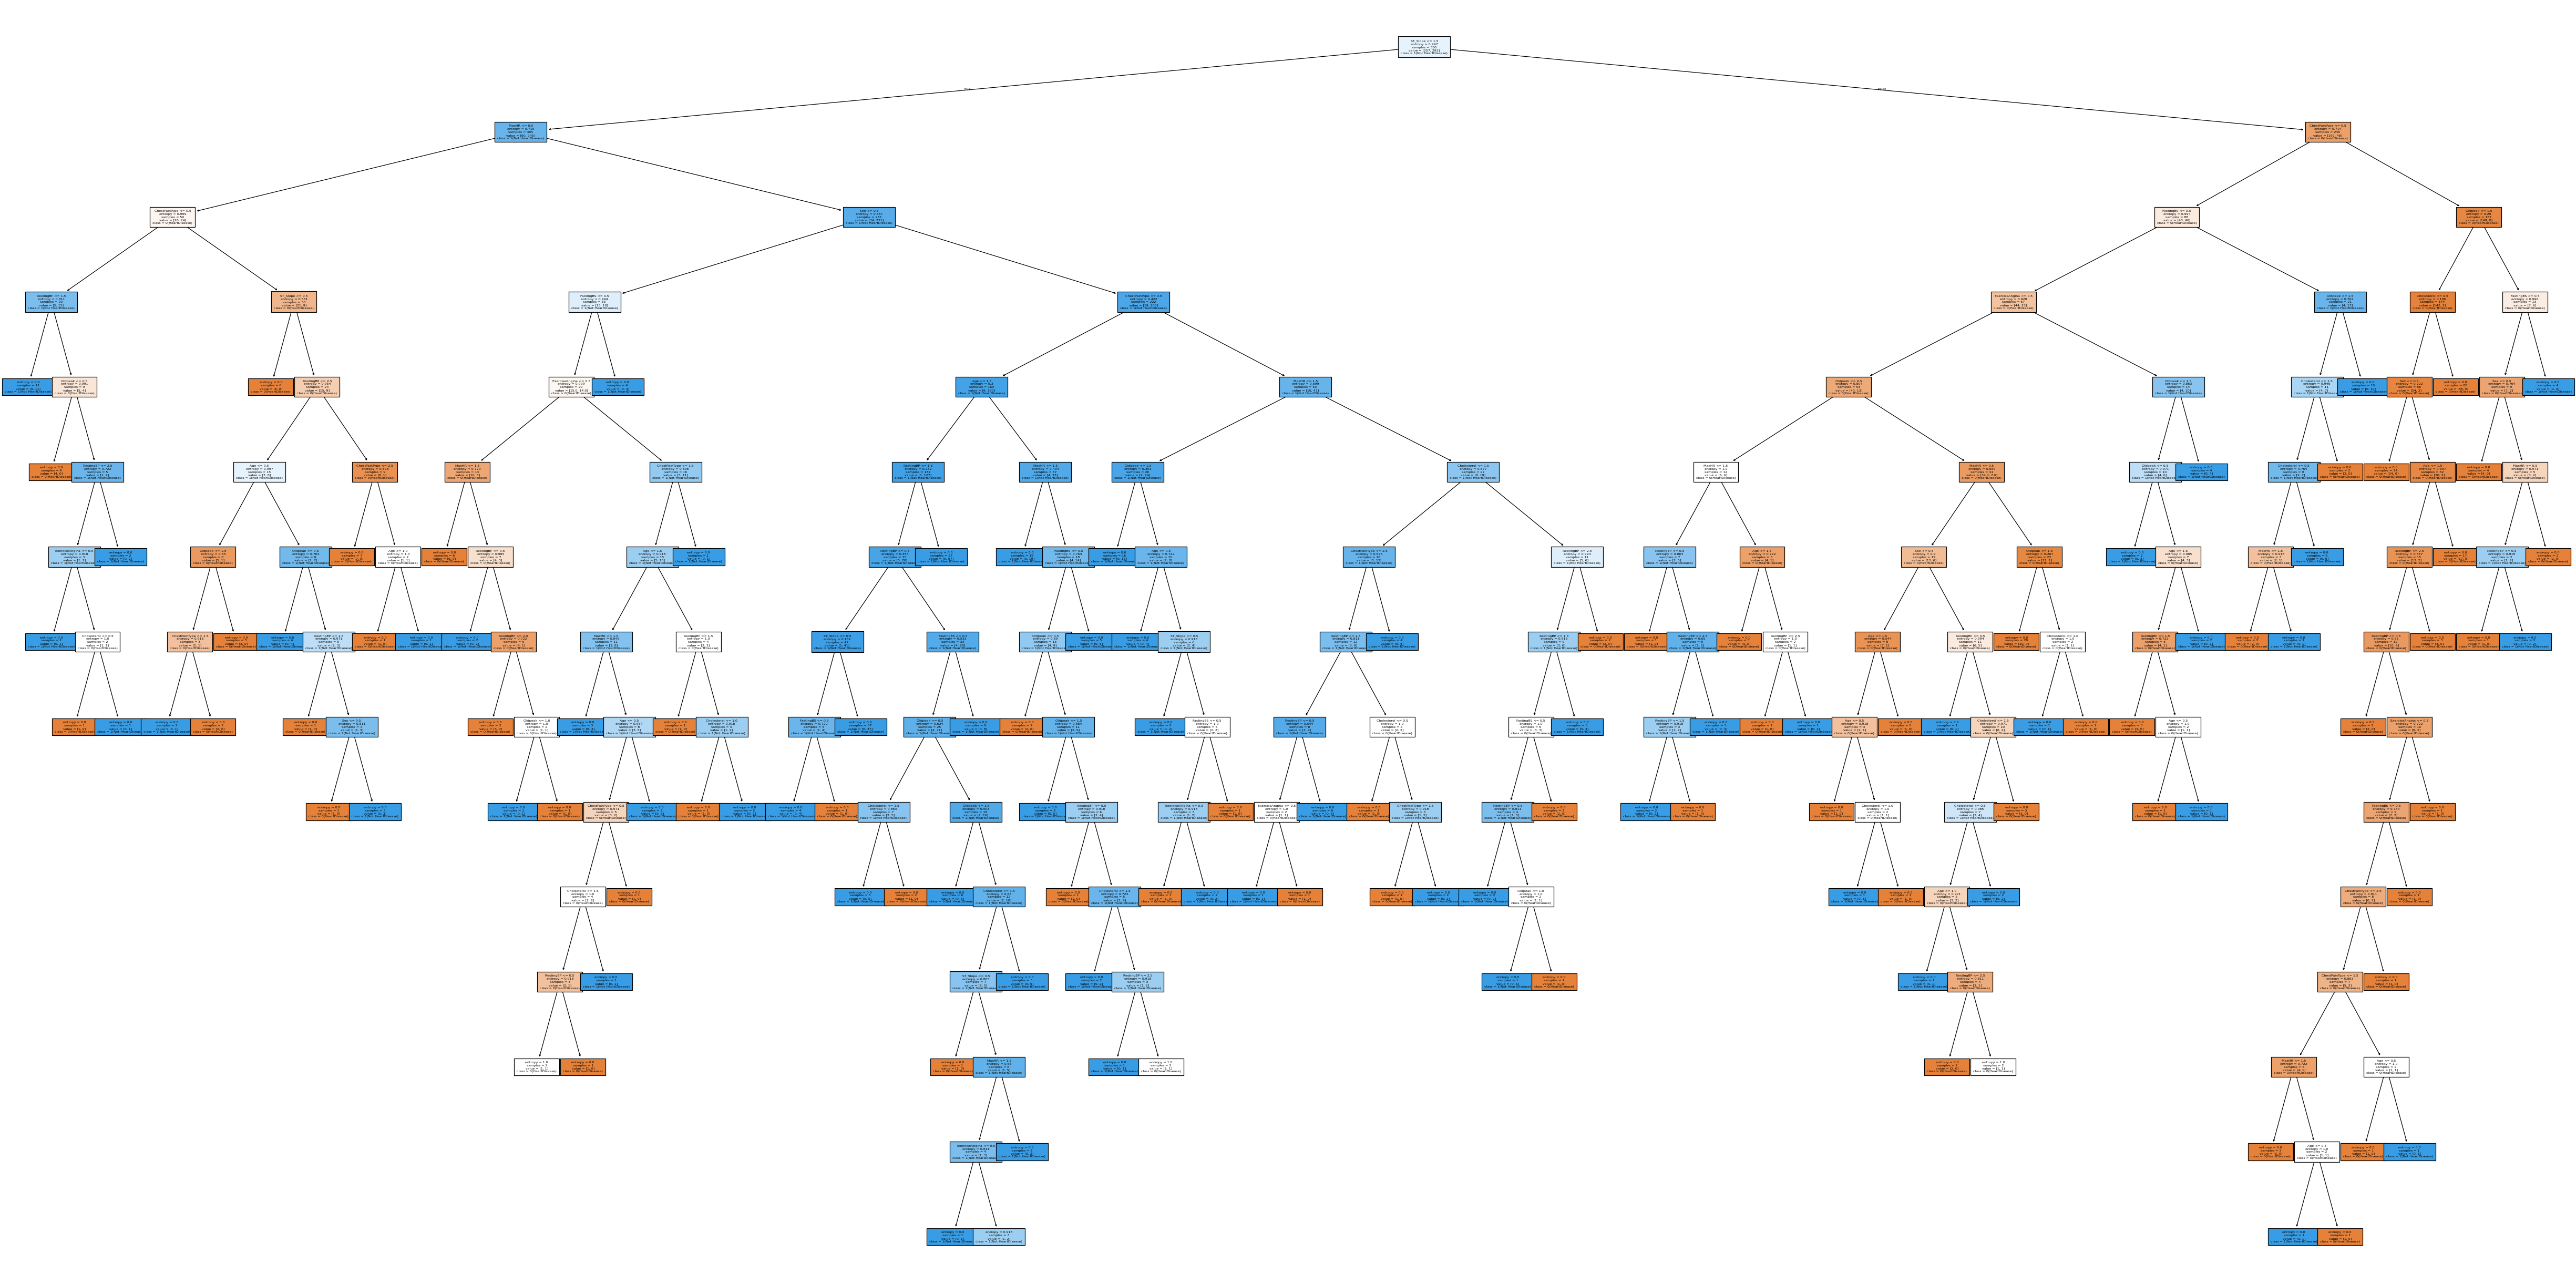

In [ ]:


import matplotlib.pyplot as plt
from sklearn import tree

# Create a figure and axis with the specified size and resolution
fig, ax = plt.subplots(figsize=(70, 35), dpi=90)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Plot the decision tree using clf3, with feature names and custom class labels, and fill the nodes with colors
tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True,
               fontsize=5,
               ax=ax)

# Display the plot
plt.show()

**Initial Split**

The decision tree begins with the feature that provides the highest information gain, creating the most effective separation between patients with heart disease and those without it. The root node divides the 550 samples into two major groups based on the strongest predictive attribute in the dataset.

**Subsequent Nodes**

After the initial split, the tree continues refining the classification using features such as ChestPainType, ExerciseAngina, and Oldpeak. These attributes appear in the upper and middle sections because they contribute significantly to identifying symptom patterns and exercise responses. Additional features like MaxHR, RestingBP, and Cholesterol appear deeper in the tree to handle more detailed distinctions.

**Leaf Nodes**

The leaf nodes at the bottom represent the final class labels: orange for HeartDisease and blue for No HeartDisease. Each leaf reflects the result of all decision rules applied along its branch. Most leaves show strong class purity, indicating confident predictions, while a few mixed leaves appear where patterns overlap.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm3)

# Calculate and print Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print Error Rate (1 - Accuracy)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]

# Calculate and print Sensitivity (Recall)
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Calculate and print Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Calculate and print Precision
precision = TP / (TP + FP)
print("Precision:", precision)


Confusion matrix:
 [[121  32]
 [ 51 164]]
Accuracy: 0.7744565217391305
Error Rate: 0.2255434782608695
Sensitivity: 0.7627906976744186
Specificity: 0.7908496732026143
Precision: 0.8367346938775511


**Accuracy:**

Represents the percentage of all predictions the model correctly classified. The model achieved an accuracy of 77.44%, meaning it accurately predicted about 77% of all cases.

**Error Rate:**

Indicates the percentage of incorrect predictions. The model’s error rate is approximately 22.55%.

**Sensitivity (Recall):**

Measures how effectively the model identifies actual heart disease cases. With a sensitivity of 76.27%, the model successfully detects most true positive cases.

**Specificity:**

Shows how well the model identifies individuals without heart disease. The specificity is 79.08%, demonstrating solid performance in recognizing true negative cases.

**Precision:**

Reflects how many of the model’s positive predictions were correct. The precision score is 83.67%, which means that when the model predicts heart disease, it is correct the vast majority of the time.



**Outcomes:**

- The model maintains strong overall accuracy (77.44%).

- With 76.27% sensitivity, it reliably captures individuals who truly have heart disease.

- Its 79.08% specificity shows good ability to correctly classify those without the condition.

- A precision of 83.67% indicates that positive predictions made by the model are highly trustworthy.


Splitting Data into: 80% Training and 20% Test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf3 = clf3.fit(X_train, y_train)


y_pred = clf3.predict(X_test)

[[59 15]
 [20 90]]


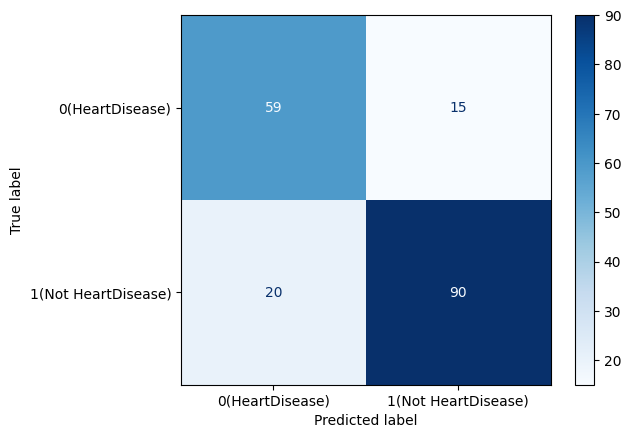

In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay

cm3 = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}


disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 59):** 59 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 15):** 15 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 20):** 20 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 90):** 90 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model correctly identified 59 patients with HeartDisease and 90 patients without HeartDisease.

However, it misclassified 15 HeartDisease patients as healthy and incorrectly predicted 20 healthy patients as having HeartDisease.

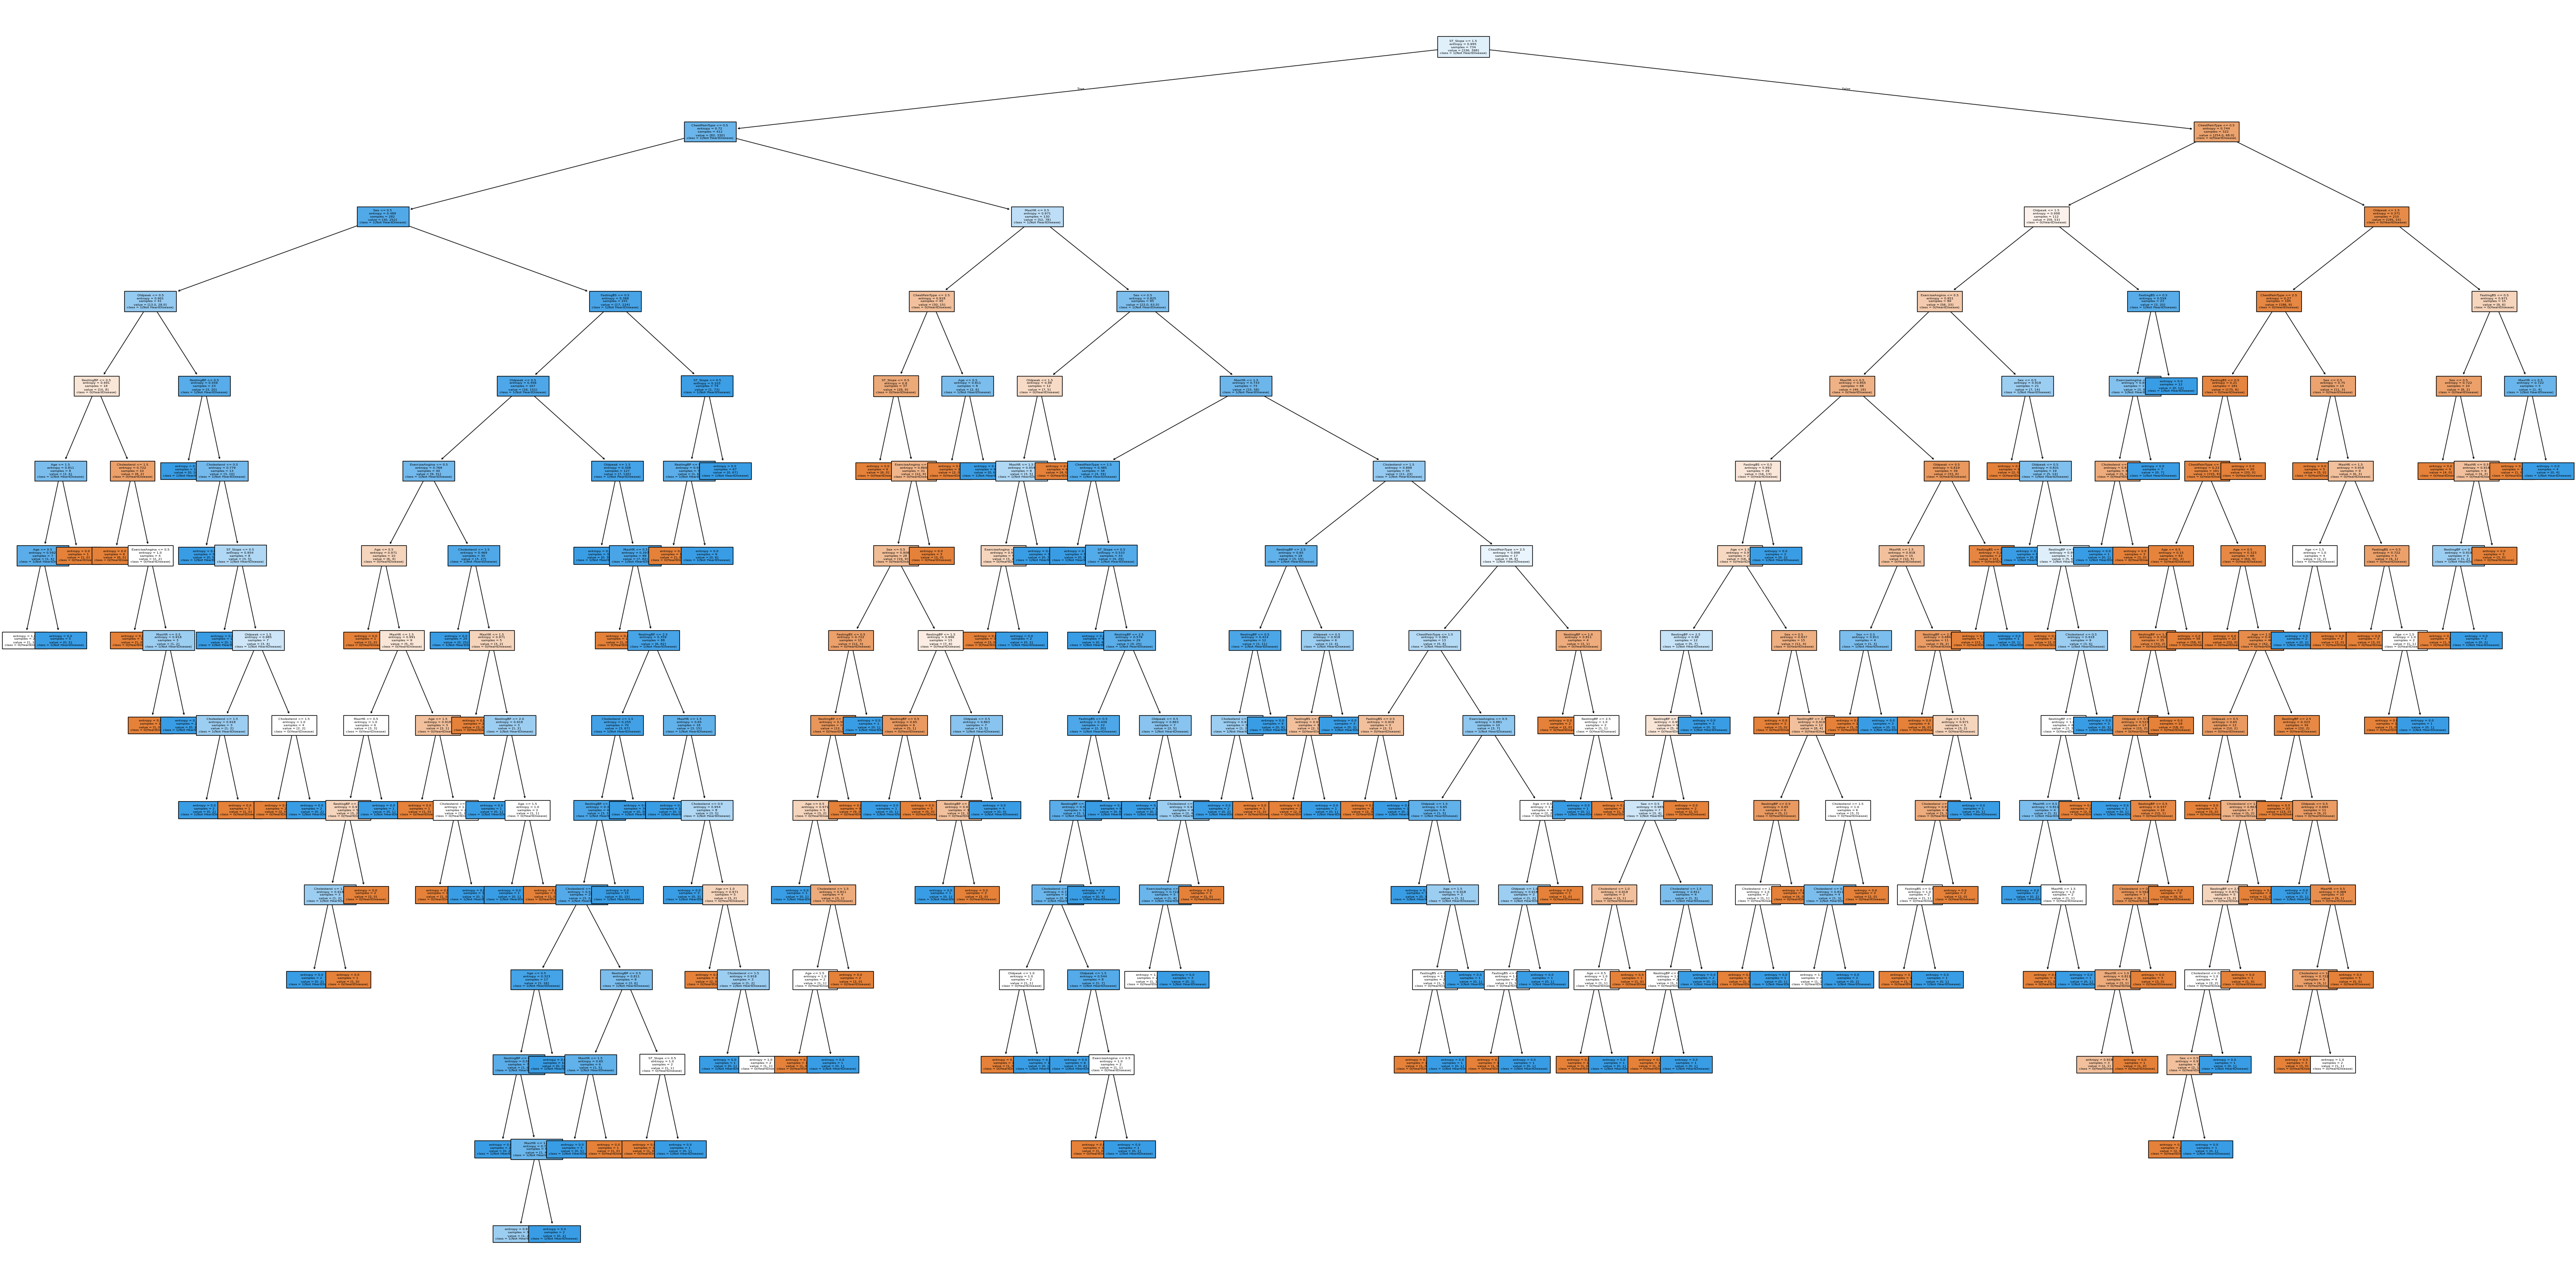

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)


class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True,
               fontsize=5,
               ax=axes


               )

plt.show()



**Initial Split**

The tree starts with the attribute that produces the clearest separation between the two classes. This root decision divides the full set of samples into two broad groups with noticeably different outcome tendencies. The first split reflects the feature with the strongest impact on distinguishing heart disease presence from absence, setting the main direction for the rest of the model.

**Subsequent Nodes**

Moving downward from the root, the tree branches through several key clinical features. Attributes such as **ChestPainType**, **ExerciseAngina**, **Oldpeak**, and **MaxHR** appear repeatedly in the upper and middle levels, showing that they play major roles in shaping early decisions. These variables help group patients by symptom profiles, physical stress responses, and ECG-related indicators. Other attributes, including **RestingBP**, **Cholesterol**, and **Age**, appear in the lower parts of the structure, where they help resolve more specific or borderline cases by adding finer distinctions.

**Leaf Nodes**

The bottom of the tree contains the leaf nodes, each representing a final predicted class. **Orange leaves correspond to HeartDisease**, while **blue leaves correspond to No HeartDisease**. Many of these leaves show strong dominance of one class, indicating that the conditions leading to them create clear and consistent groupings. A smaller number of leaves contain mixed values, reflecting areas where patient characteristics overlap. Overall, the leaf distribution shows how the combination of clinical features across the branches leads to increasingly specific and confident classification outcomes.



In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)


confusion matrix : 
 [[59 15]
 [20 90]]
Accuracy: 0.8097826086956522
Error Rate: 0.19021739130434778
Sensitivity: 0.8181818181818182
Specificity: 0.7972972972972973
Precision: 0.8571428571428571


**Accuracy:**

Shows the percentage of total predictions the model classified correctly. The model reached an accuracy of 80.97%, meaning it correctly predicted a little over three-quarters of all cases.

**Error Rate:**

Represents the percentage of predictions that were incorrect. The model’s error rate is approximately 19.02%.

**Sensitivity (Recall):**

Indicates how well the model identifies actual heart disease cases. With a sensitivity of 81.81%, the model successfully detects the majority of true positive cases.

**Specificity:**

Measures the model’s ability to correctly recognize individuals without heart disease. The specificity is 79.72%, showing strong performance in identifying true negative cases.

**Precision:**

Reflects how many of the model’s positive predictions were actually correct. The precision score of 85.71% indicates that most predicted heart disease cases are accurate.

**Outcomes:**

- The model demonstrates solid overall performance, with an accuracy of 80.97%.

- With 81.81% sensitivity, it effectively identifies many true heart disease cases.

- The 79.72% specificity highlights the model’s reliability in detecting individuals without the condition.

- A precision of 85.71% shows that the model’s positive predictions are highly dependable.

**Evaluate the Models of Information Gain**

Summary of the Results

| **Split**   | **Accuracy** | **Error Rate** | **Sensitivity** | **Specificity** | **Precision** |
| ----------- | ------------ | -------------- | --------------- | --------------- | ------------- |
| **70%–30%** | **0.7644**   | **0.2355**     | **0.7604**      | **0.7706**      | **0.8355**    |
| **60%–40%** | **0.7744**   | **0.2255**     | **0.7627**      | **0.7908**      | **0.8367**    |
| **80%–20%** | **0.8097**   | **0.1902**     | **0.8181**      | **0.7972**      | **0.8571**    |


**Evaluation of Models**



• Accuracy:
Accuracy remains consistent across all three splits, ranging from 76.44% to 80.97%. This shows that the Information Gain model performs stably across different dataset partitioning ratios. The 80–20 split achieves the highest accuracy (80.97%), while the 60–40 and 70–30 splits follow with 77.44% and 76.44%, respectively. This indicates that giving the model more training data results in improved performance.

• Error Rate:
The error rate ranges between 19.02% and 23.55%, which is the inverse of the accuracy results. The lowest error rate occurs in the 80–20 split (0.1902), showing that this configuration makes the fewest incorrect predictions. The slight variation between splits reflects stable model behavior.

• Sensitivity (True Positive Rate):
Sensitivity varies from 76.04% (70–30) to 81.81% (80–20). This demonstrates that the 80–20 split provides the strongest ability to correctly detect heart-disease cases. Overall, the model consistently identifies most true positives, but performance improves when the model is trained on more data.

• Specificity (True Negative Rate):

Specificity ranges from 77.06% to 79.72%.
The highest value comes from the 80–20 split, meaning that with more training data the model becomes more accurate at identifying healthy cases and avoids false alarms more effectively.

• Precision:
Precision ranges from 83.55% to 85.71%, with the highest precision achieved in the 80–20 split (0.8571). This shows that the model produces fewer false positives and maintains strong reliability when predicting heart disease.

**Conclusion**

Overall, the Information Gain model demonstrates reliable and consistent performance across all three splits, with the 80–20 split delivering the best overall results by achieving the highest accuracy (80.97%), lowest error rate (19.02%), strongest sensitivity (81.81%), highest specificity (79.72%), and highest precision (85.71%). These results show that the model becomes more effective and generalizes better when trained on a larger portion of the data.


**Gini Index:**
**Splitting Data into: 70% Training and 30% Test:**  

In [ ]:

from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf4 = DecisionTreeClassifier(criterion='gini',random_state=1)

clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)

[[ 82  27]
 [ 34 133]]


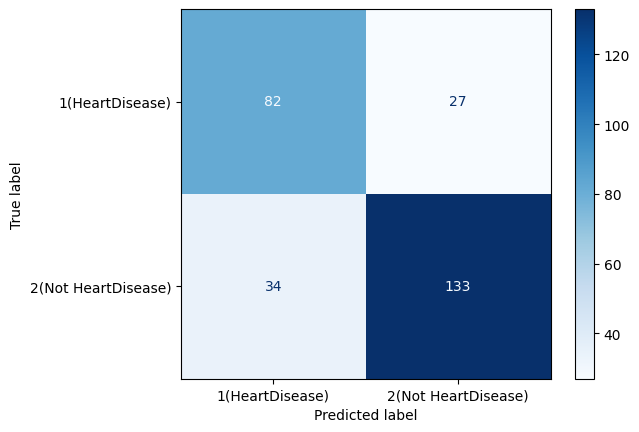

In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 82):** 82 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 27):** 27 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 34):** 34 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 133):** 133 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model correctly identified 82 patients with HeartDisease and 133 patients without HeartDisease.

However, it misclassified 27 HeartDisease patients as healthy and incorrectly predicted 34 healthy patients as having HeartDisease.


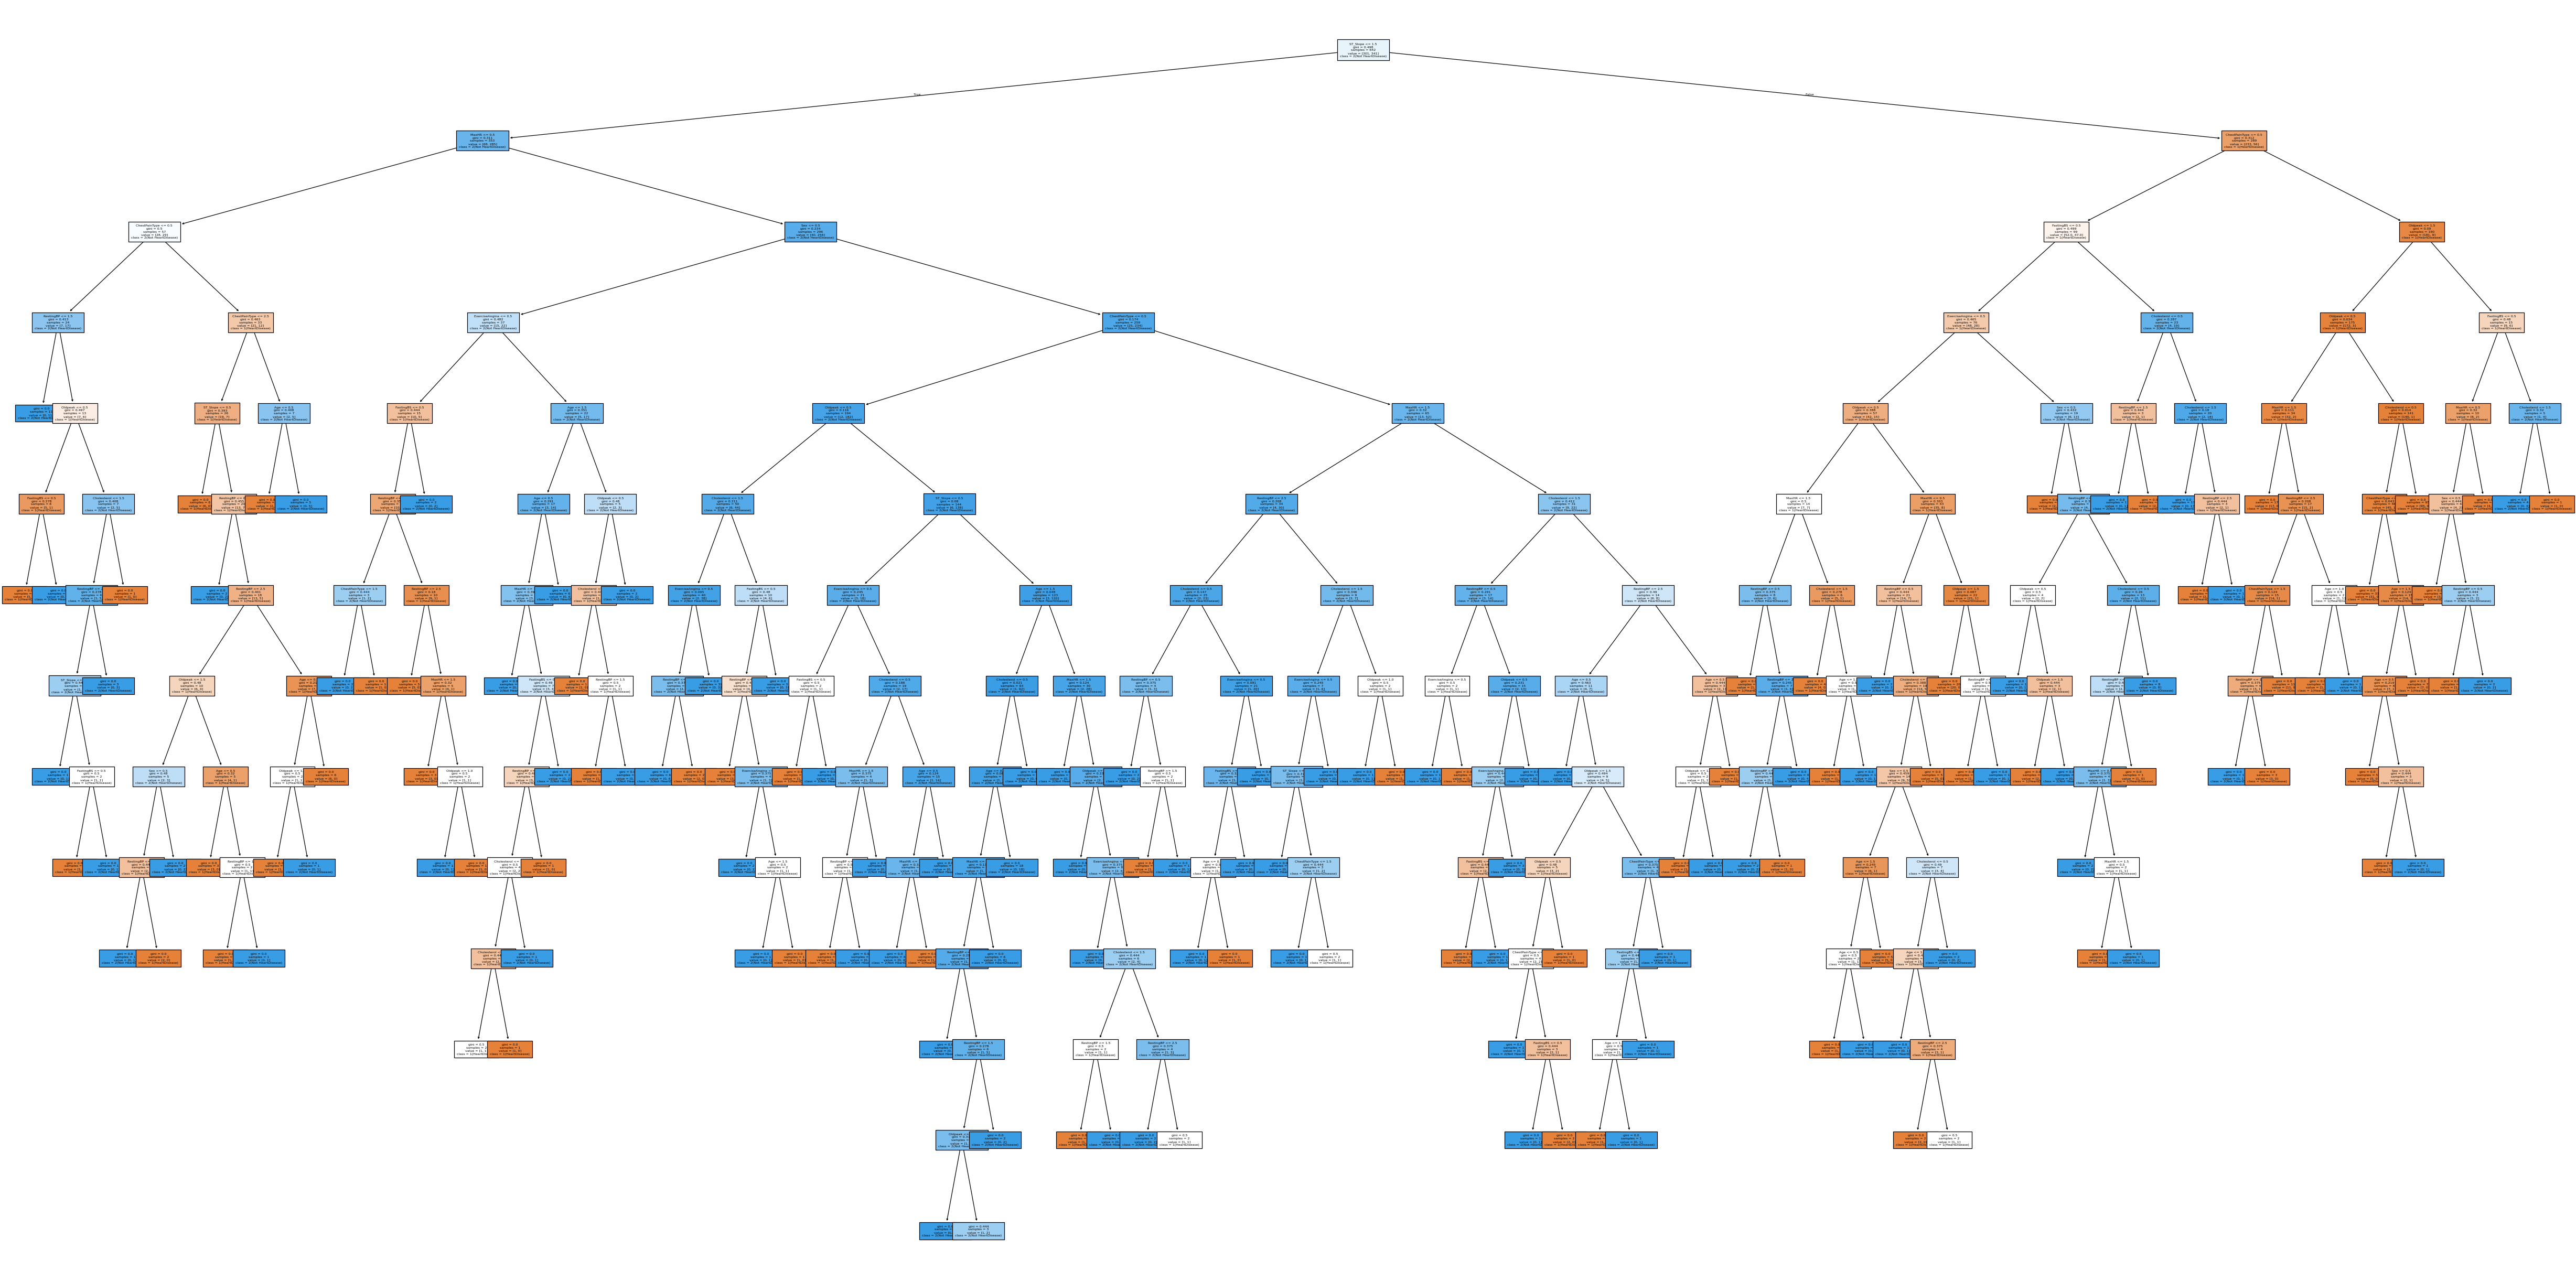

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)


class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}

tree.plot_tree(clf4,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[2]],
               filled=True,
               fontsize=5,
               ax=axes

               )

plt.show()

**Initial Split**

The decision tree begins with a single feature at the root, selected because it provides the highest reduction in Gini impurity. The root node displays its impurity value, the number of samples, the class distribution, and the threshold applied to the feature. This first decision divides the dataset into two major groups, representing the most informative separation based on the value shown in the root node.

**Subsequent Nodes**

As the tree expands, it continues splitting the data using attributes such as Oldpeak, MaxHR, ChestPainType, ExerciseAngina, RestingBP, and Cholesterol. Each internal node shows the specific threshold or category used for the split, along with its updated impurity and sample count. These attributes appear throughout the upper and middle sections because their values further reduce impurity and create more distinct patient groups. Deeper nodes apply increasingly specific thresholds to resolve cases that remain mixed after earlier decisions.

**Leaf Nodes**

The leaf nodes show the final classification reached after all splits along a path. Each leaf contains the predicted class label, the Gini impurity at that endpoint, the number of samples assigned to the leaf, and the final class distribution. These leaves represent the completed decision outcomes based entirely on the sequence of attribute values and thresholds used throughout the tree.

In [ ]:


from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[ 82  27]
 [ 34 133]]
Accuracy: 0.7789855072463768
Error Rate: 0.22101449275362317
Sensitivity: 0.7964071856287425
Specificity: 0.7522935779816514
Precision: 0.83125


**Accuracy:**

Represents how many of the model’s predictions were correct out of all predictions made. The model achieved an accuracy of 77.89%, meaning it correctly classified approximately three-quarters of the cases.

**Error Rate:**

Shows the proportion of predictions that were incorrect. The model’s error rate is 22.10%, indicating that a little under one-quarter of predictions were misclassified.

**Sensitivity (Recall):**

Indicates how effectively the model identifies true heart disease cases. With a sensitivity of 79.64%, the model successfully detects most positive cases, though some true positives are still missed.

**Specificity:**

Measures the model’s ability to correctly identify individuals without heart disease. The specificity is 75.22%, showing strong performance in recognizing true negatives.

**Precision:**

Reflects the proportion of positive predictions that were actually correct. A precision of 83.12% indicates that when the model predicts heart disease, it is accurate the vast majority of the time.

**Outcomes:**

- The model delivers a consistent overall accuracy of 77.89%.

- Its 79.64% sensitivity shows reasonable ability to detect heart disease cases.

- A high 75.22% specificity demonstrates reliability in identifying individuals without the condition.

- The strong precision of 83.12% highlights dependable positive predictions.


Splitting Data into: 60% Training and 40% Test:

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Split data into 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(criterion='gini', random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

[[119  34]
 [ 54 161]]


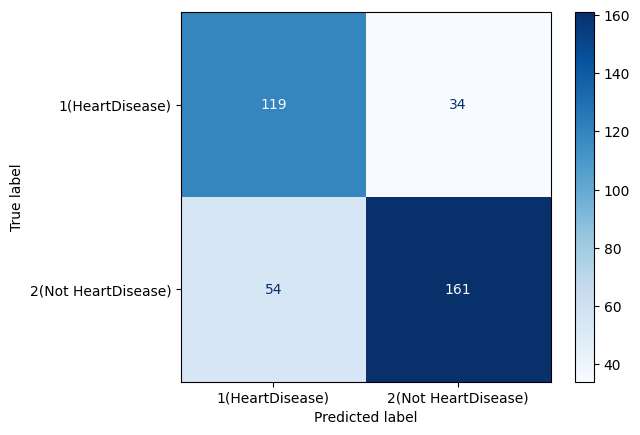

In [ ]:


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 119):** 119 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 34):** 34 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 54):** 54 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 161):** 161 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model accurately identified 119 true HeartDisease cases and 161 true non-HeartDisease cases.

However, it misclassified 34 HeartDisease patients as healthy, and it also incorrectly labeled 54 healthy individuals as having HeartDisease.


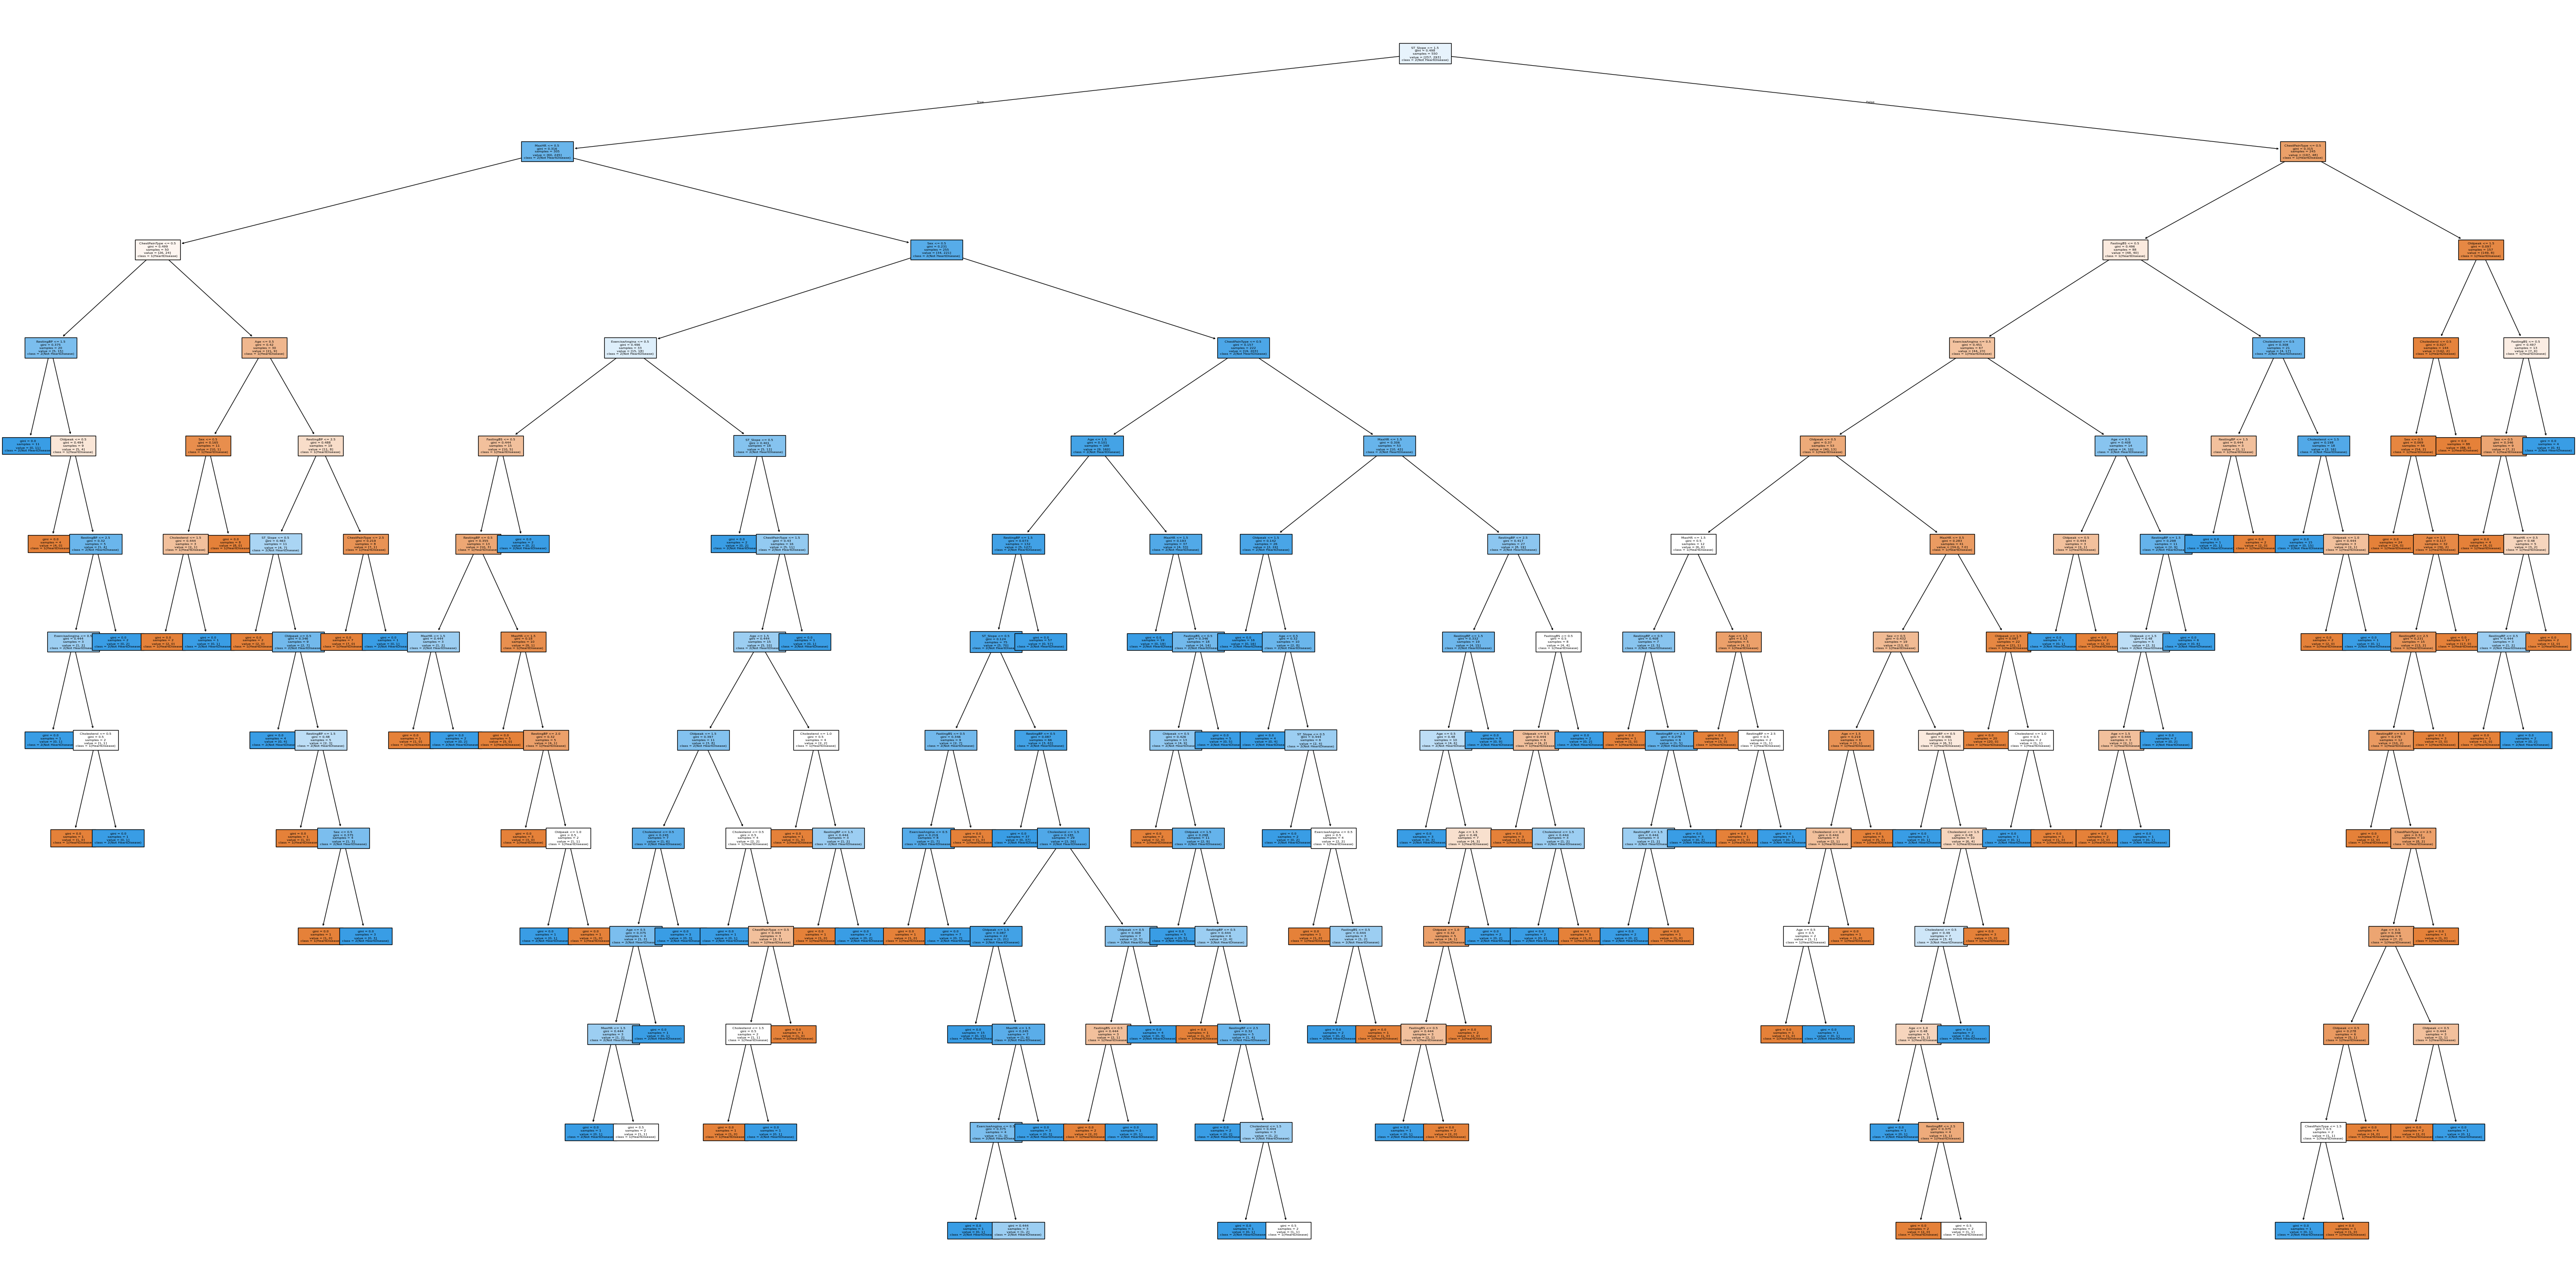

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}

plot_tree(clf,
          feature_names=X.columns,
          class_names=[class_labels[1], class_labels[2]],
          filled=True,
          fontsize=5,
          ax=axes
          )

plt.show()

**Initial Split**

The tree starts with a root node that applies the feature and threshold producing the largest reduction in Gini impurity. The node displays the impurity score, the number of samples included, and the distribution of the two classes. This first condition divides the dataset into two broad segments, establishing the most influential separation point in the entire model based on the numerical value shown in the root split.


**Subsequent Nodes**

Following the root decision, the tree develops multiple layers of internal splits that rely on attributes such as Oldpeak, MaxHR, ChestPainType, ExerciseAngina, RestingBP, Cholesterol, and Age. Each node provides the exact threshold or category used, along with its impurity and sample count. These features repeatedly appear because they continue to reduce impurity at different parts of the tree. As the model progresses to deeper levels, the conditions become more specific, addressing sample groups that were not fully separated in earlier stages.


**Leaf Nodes**

The terminal nodes at the bottom of the tree contain the final predicted class along with the impurity value, total samples, and class distribution for that endpoint. These leaves represent the conclusion of the decision-making path, reached after applying all feature thresholds from the root to the final node. Each leaf shows a completed classification outcome determined by the sequence of attribute-based conditions visible within the tree.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[119  34]
 [ 54 161]]
Accuracy: 0.7608695652173914
Error Rate: 0.23913043478260865
Sensitivity: 0.7488372093023256
Specificity: 0.7777777777777778
Precision: 0.8256410256410256


**Accuracy:**

Shows the percentage of all predictions the model classified correctly. The model achieved an accuracy of 76.08%, meaning it correctly predicted nearly 76% of all cases.

**Error Rate:**

Represents the share of predictions that were incorrect. The error rate is approximately 23.91%, indicating that about one-fifth of predictions were misclassified.

**Sensitivity (Recall):**

Measures how well the model detects actual heart disease cases. With a sensitivity of 74.88%, the model successfully identifies most true positive cases, though some are still missed.

**Specificity:**

Indicates the model’s ability to correctly recognize cases without heart disease. The specificity of 77.77% demonstrates strong performance in detecting true negatives.

**Precision:**

Shows the proportion of positive predictions that were accurate. The precision score of 82.56% means that when the model predicts heart disease, it is correct the vast majority of the time.

**Outcomes:**

- The model performs well overall, with an accuracy of 76.08%.

- Its sensitivity of 74.88% indicates reliable detection of true heart disease cases.

- The specificity of 77.77% shows strong ability to classify individuals who do not have the condition.

- The high precision (82.56%) highlights that the model’s positive predictions are very dependable.

Splitting Data into: 80% Training and 20% Test:

In [ ]:

from sklearn.tree import DecisionTreeClassifier

#Split the data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(criterion='gini', random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

[[60 14]
 [22 88]]


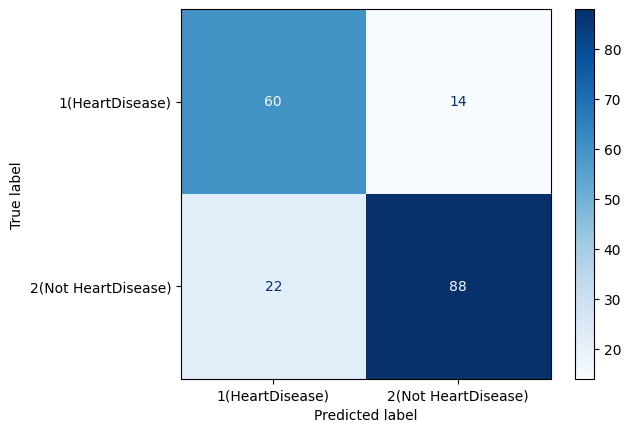

In [ ]:


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 60):** 60 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 14):** 14 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 22):** 22 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 88):** 88 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model correctly classified 60 patients with HeartDisease and 88 patients without HeartDisease.

On the other hand, it misclassified 14 HeartDisease cases as non-HeartDisease and incorrectly labeled 22 healthy patients as having HeartDisease.

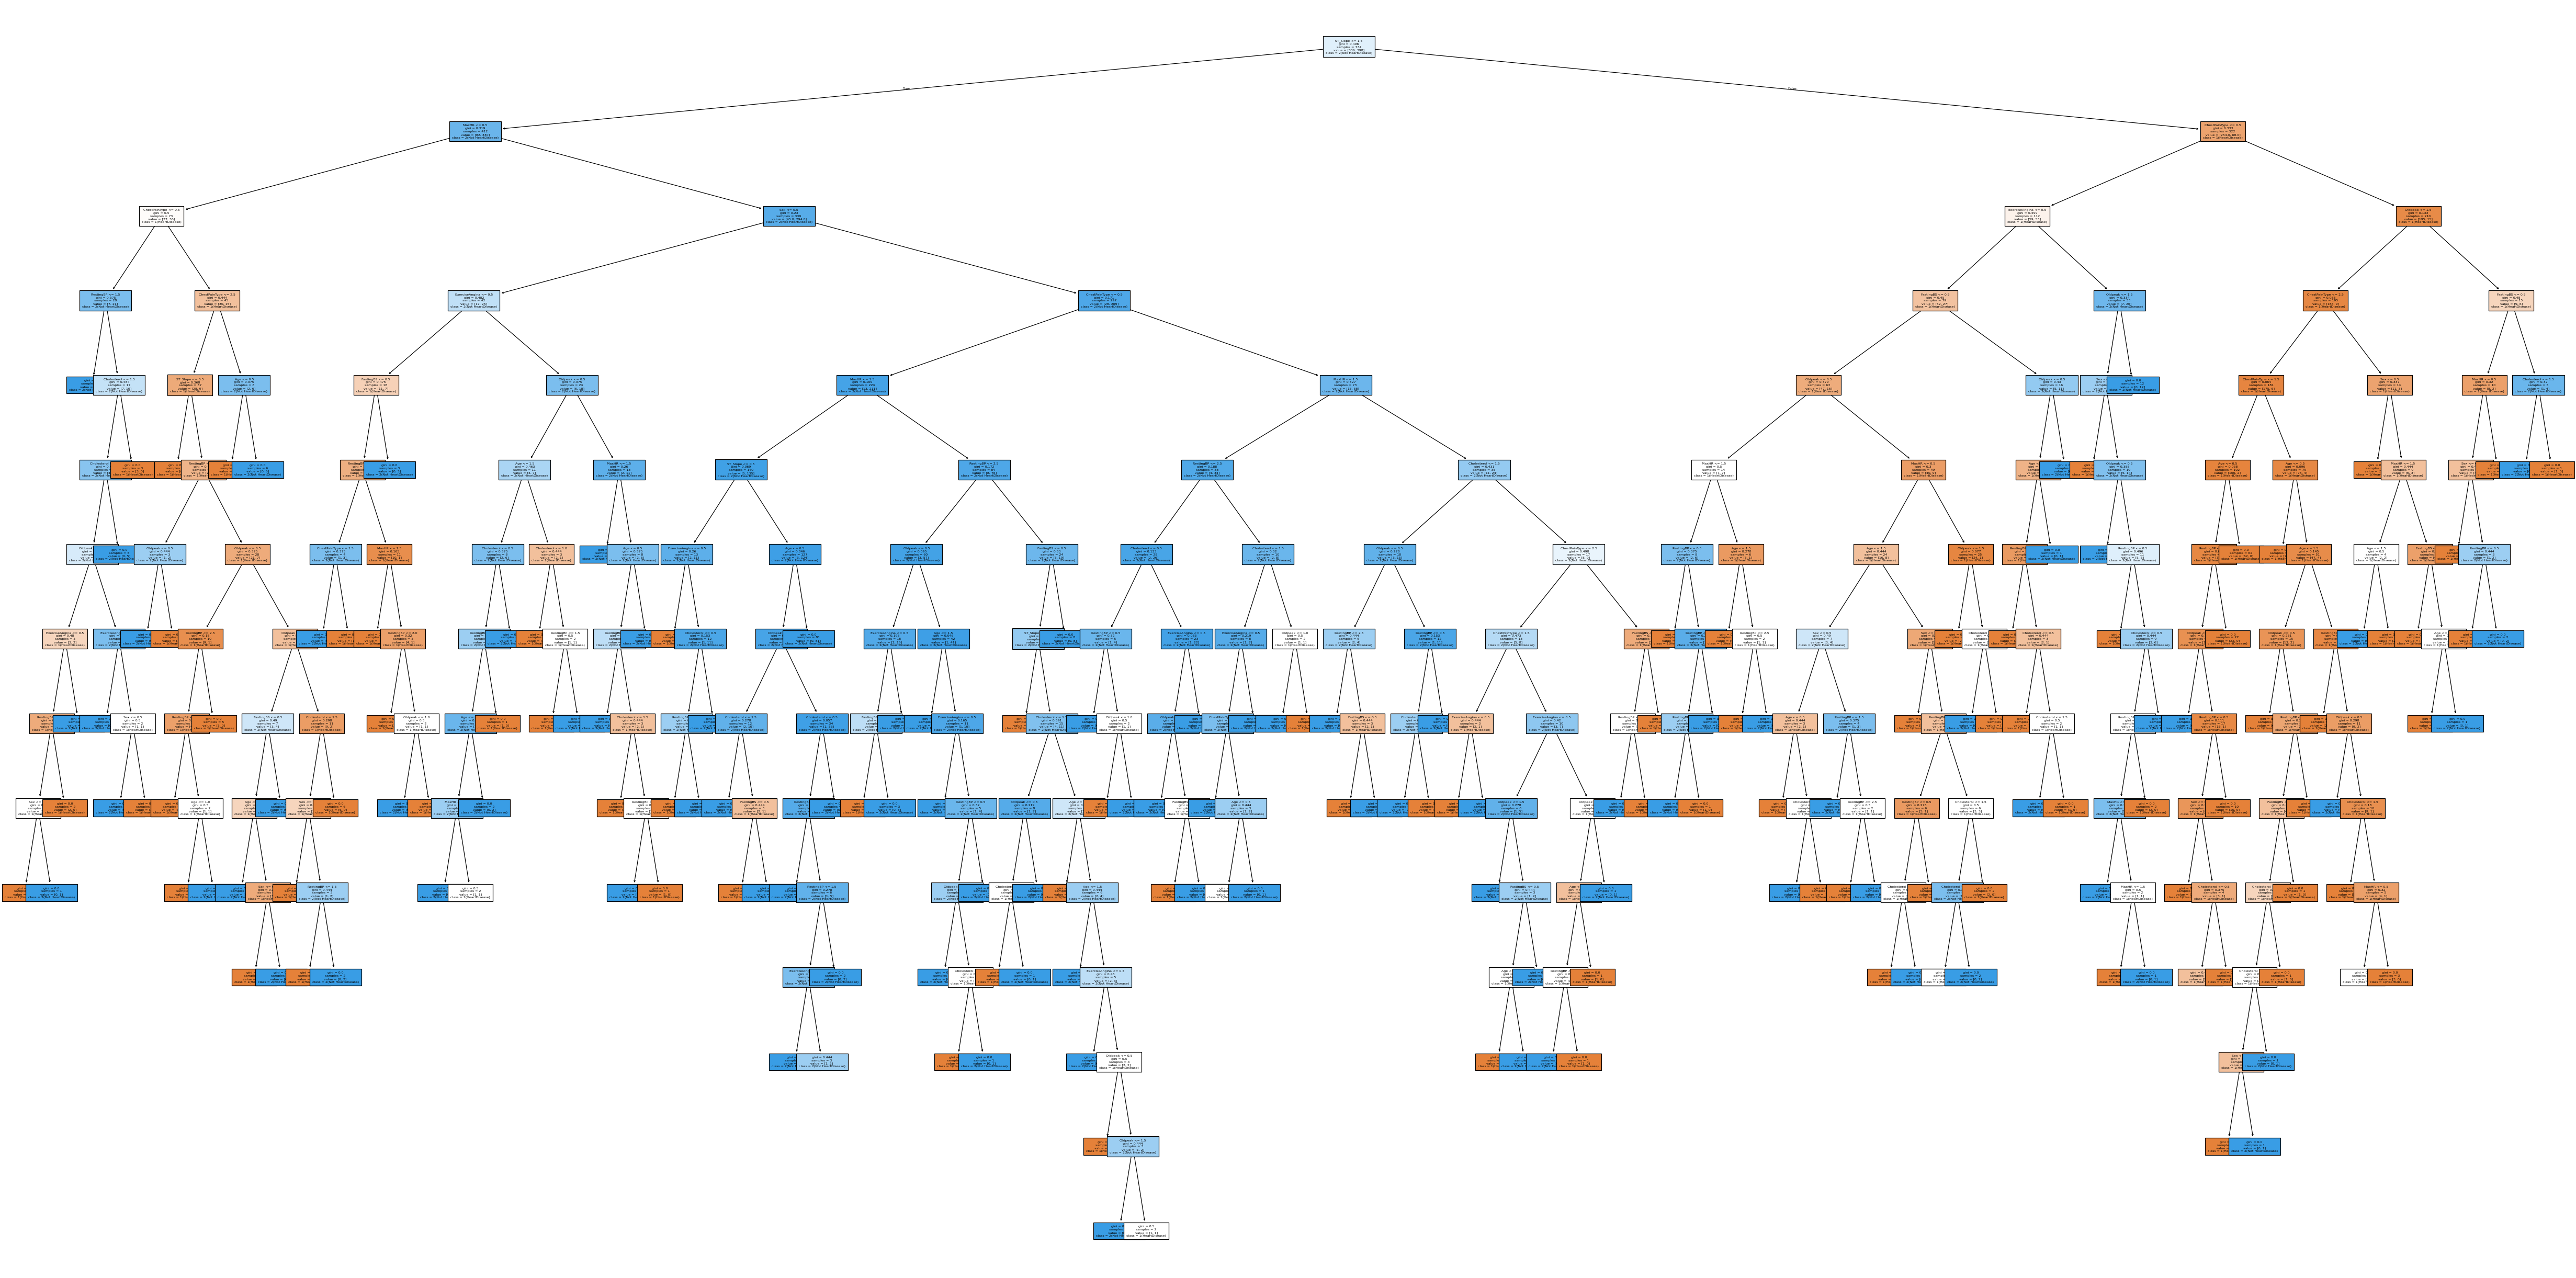

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}

plot_tree(clf,
          feature_names=X.columns,
          class_names=[class_labels[1], class_labels[2]],
          filled=True,
          fontsize=5,
         ax=axes
           )

plt.show()

**Initial Split**

The first division in this tree is created using the feature that gives the strongest reduction in Gini impurity for this dataset. The root node shows the threshold applied, as well as the impurity level and the number of samples involved. This split divides the data into two large sections that differ clearly in their class distributions, making it the most impactful decision in the entire model.

**Subsequent Nodes**

Below the root, the tree branches into multiple layers where features such as Oldpeak, ExerciseAngina, MaxHR, ChestPainType, and RestingBP are used repeatedly. Each node contains the exact condition used for the split, the updated impurity, and the sample count at that point. These attributes appear often in the upper parts of the tree because their thresholds continue to separate the data effectively. As the tree extends downward, additional splits with more specific values refine the classification for smaller groups that were not fully separated by the earlier decisions.

**Leaf Nodes**

At the terminal points of the tree, the leaf nodes list the final class decision along with the impurity value, the number of samples, and the distribution of the two classes assigned to that leaf. These nodes represent endpoints where further splitting is not beneficial or where the purity is already adequate. Every leaf summarizes the outcome reached after following the exact sequence of attribute-based conditions shown along that branch.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[60 14]
 [22 88]]
Accuracy: 0.8043478260869565
Error Rate: 0.19565217391304346
Sensitivity: 0.8
Specificity: 0.8108108108108109
Precision: 0.8627450980392157


**Accuracy:**

Represents the proportion of total predictions the model classified correctly. The model achieved an accuracy of 80.43%, meaning it correctly predicted just over three-quarters of all cases.

**Error Rate:**

Indicates the percentage of predictions that were incorrect. The model’s error rate is 19.56%, showing that about one-quarter of predictions were misclassified.

**Sensitivity (Recall):**

Shows how effectively the model identifies true heart disease cases. With a sensitivity of 80%, the model successfully captures most positive cases, although some true positives are missed.

**Specificity:**

Measures the model’s ability to correctly classify individuals who do not have heart disease. The specificity is 81.08%, demonstrating strong performance in recognizing true negatives.

**Precision:**

Reflects the proportion of positive predictions that were actually correct. The precision score of 86.27% indicates that when the model predicts heart disease, it is accurate the vast majority of the time.

**Outcomes:**

- The model shows solid overall accuracy (80.43%).

- With 80% sensitivity, it reliably identifies many true heart disease cases.

- Its 81.08% specificity highlights effectiveness in recognizing individuals without the condition.

- A high precision of 86.27% means the model’s positive predictions are highly trustworthy.

**Evaluate the Models of Information Gain**

Summary of the Results

| **Split**   | **Accuracy** | **Error Rate** | **Sensitivity** | **Specificity** | **Precision** |
| ----------- | ------------ | -------------- | --------------- | --------------- | ------------- |
| **70%–30%** | **0.7789**   | **0.2210**     | **0.7964**      | **0.7522**      | **0.8312**    |
| **60%–40%** | **0.7608**   | **0.2391**     | **0.7488**      | **0.7777**      | **0.8256**    |
| **80%–20%** | **0.8043**   | **0.1956**     | **0.8000**      | **0.8108**      | **0.8627**    |


**Evaluation of Models**

• Accuracy:
Accuracy values range from 76.08% to 80.43%, showing that the Gini model performs consistently across different splits. The 80–20 split achieves the highest accuracy (80.43%), meaning the model learns more effectively when given more training data. Overall, the Gini index provides stable and reliable classification results.

• Error Rate:
The error rate lies between 19.56% and 23.91%, which matches the accuracy pattern.
The lowest error rate occurs in the 80–20 split (0.1956), confirming that this configuration produces the fewest incorrect predictions. The small variation across splits indicates that the model is stable and not affected heavily by changes in training size.

• Sensitivity (True Positive Rate):
Sensitivity ranges from 74.88% (60–40) to 80.00% (80–20).
This shows that the model detects more heart-disease cases when trained with a larger portion of the data. Overall, the Gini model captures most positive cases but performs best under the 80–20 configuration.

• Specificity (True Negative Rate):
Specificity values range between 75.22% and 81.08%, with the highest value from the 80–20 split (0.8108).
This means the model is strong at identifying non–heart-disease cases (true negatives). Higher specificity also indicates fewer false positives, showing that the model is reliable when predicting healthy cases.

• Precision:
Precision ranges from 82.56% to 86.27%, with the highest precision seen in the 80–20 split (0.8627).
This means most of the model’s positive predictions (heart disease) were correct. The high precision across all splits indicates consistently strong predictive reliability.

**Conclusion**

The Gini Index model shows strong performance across all three splits, with the 80–20 split producing the best accuracy and lowest error rate, making it the strongest overall configuration. The model demonstrates excellent specificity and precision, indicating that it reliably identifies healthy patients and produces few false positives. Overall, the Gini-based decision tree provides slightly stronger performance than Information Gain in some splits, while maintaining stable results across all configurations.

**Comparison of the Best Model Between Information Gain and Gini Index and Analysis of Results**

Information Gain vs. Gini Index

| **Metric**      | **Info Gain (70–30)** | **Gini (70–30)** | **Info Gain (60–40)** | **Gini (60–40)** | **Info Gain (80–20)** | **Gini (80–20)** |
| --------------- | --------------------- | ---------------- | --------------------- | ---------------- | --------------------- | ---------------- |
| **Accuracy**    | 0.7645                | **0.7789**       | **0.7744**            | 0.7608           | **0.8098**            | 0.8043           |
| **Error Rate**  | 0.2355                | **0.2210**       | **0.2255**            | 0.2391           | 0.1902                | **0.1956**       |
| **Sensitivity** | 0.7605                | **0.7964**       | **0.7627**            | 0.7488           | **0.8182**            | 0.8000           |
| **Specificity** | 0.7706                | **0.7522**       | 0.7908                | **0.7777**       | 0.7973                | **0.8108**       |
| **Precision**   | 0.8355                | **0.8312**       | 0.8367                | **0.8256**       | 0.8571                | **0.8627**       |



To compare both decision tree models, the performance metrics from each train–test split were reviewed, including accuracy, error rate, sensitivity, specificity, and precision. Both models show stable and consistent behavior across all splits, but there are clear differences in how they perform across the metrics.

**1-Accuracy:**
Both Information Gain and Gini Index achieve strong performance across all splits, with their best accuracy appearing in the 80%–20% split. Information Gain reaches 80.98%, slightly higher than the Gini Index at 80.43%. This shows that both models benefit from having more training data, but Information Gain achieves the highest overall accuracy.

**2-Error Rate:**
The lowest error rates for both models appear in the 80%–20% split.

Information Gain: 19.02%

Gini Index: 19.56%

This confirms that both models make fewer incorrect predictions when trained on more data, with Information Gain performing slightly better.

**3-Sensitivity (True Positive Rate):**
Information Gain consistently achieves higher sensitivity values than Gini across all splits, with its highest value being 81.82% in the 80–20 split, compared to 80.00% for Gini. This means Information Gain is better at identifying true heart-disease cases and reducing false negatives.

**4-Specificity (True Negative Rate):**
The Gini Index model shows stronger specificity, with its highest value reaching 81.08% in the 80–20 split, compared to 79.73% for Information Gain. This indicates that Gini is better at correctly identifying healthy individuals, reducing false positives.

**5-Precision:**
Precision values are high for both models, but Gini performs better overall, achieving 86.27%, while Information Gain reaches 85.71% at best. This shows that Gini produces fewer false-positive predictions and is more reliable when predicting heart disease.


**Final Analysis:**

Information Gain is the best overall model if the goal is to detect as many heart-disease cases as possible (medical priority).
Gini is the best overall model if the goal is to reduce false positives and improve diagnostic reliability.

# Clustering

Clustering is an unsupervised learning technique, which means it does not rely on labeled data. Because of this, the HeartDisease target column is removed from the dataset before performing clustering, since it is not needed. The dataset also contains categorical features, which must be converted into numerical values to allow the clustering algorithm to work properly. To achieve this, we applied ordered mapping to transform categorical attributes, while continuous variables such as Age, RestingBP, Cholesterol, MaxHR, and Oldpeak were kept in numerical form.

**Prepar for clustring**

The discretized features in the dataset—*Age, RestingBP, Cholesterol, MaxHR,* and *Oldpeak*—are all ordinal categorical variables, meaning their categories follow a natural, ordered progression. To make them suitable for clustering, these ordered categories must be converted into numerical values. This is done through **ordinal encoding**, where each category is mapped to a specific number based on its order.

* **Age:** The groups *Young*, *Middle-Aged*, and *Old* are assigned increasing numeric values (e.g., Young = 0, Middle-Aged = 1, Old = 2).
* **RestingBP:** The levels *Very Low*, *Low*, *Normal*, and *High* are encoded in ascending order (e.g., Very Low = 0, Low = 1, Normal = 2, High = 3).
* **Cholesterol:** The categories *Low*, *Medium*, and *High* are represented numerically (e.g., Low = 0, Medium = 1, High = 2).
* **MaxHR:** The groups *Low*, *Medium*, and *High* follow an ordered numeric mapping (e.g., Low = 0, Medium = 1, High = 2).
* **Oldpeak:** The categories *No Depression*, *Mild Depression*, and *Severe Depression* are encoded to reflect severity (e.g., No Depression = 0, Mild Depression = 1, Severe Depression = 2).

In [ ]:
import pandas as pd

data = pd.read_csv('/content/preprocessed1.csv')

# Define the ordered mappings for each feature
ordered_mappings = {
    'Age': {'Young Adults': 0, 'Middle-Aged': 1, 'Seniors': 2},
    'RestingBP': {'Very Low': 0, 'Low': 1, 'Normal': 2, 'High': 3},
    'Cholesterol': {'Low': 0, 'Medium': 1, 'High': 2},
    'MaxHR': {'Low': 0, 'medium': 1, 'High': 2},
    'Oldpeak': {'No Depression': 0, 'Mild Depression': 1, 'Severe Depression': 2}
}

# Apply the custom encoding based on defined mappings
for col, mapping in ordered_mappings.items():
    if col in data.columns:
        data[col] = data[col].map(mapping)

# Save the encoded dataset
data.to_csv('Encoded2_data.csv', index=False)

# Display the first few rows of the encoded dataset
print("Data after Custom Ordered Encoding:")
print(data.head())

Data after Custom Ordered Encoding:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  \
0  NaN    1              1        NaN          NaN          0    NaN   
1  NaN    0              2        NaN          NaN          0    NaN   
2  NaN    1              1        NaN          NaN          0    NaN   
3  NaN    0              0        NaN          NaN          0    NaN   
4  NaN    1              2        NaN          NaN          0    NaN   

   ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0               0      NaN         2             0  
1               0      NaN         1             1  
2               0      NaN         2             0  
3               1      NaN         1             1  
4               0      NaN         2             0  


**Scaling Data**

After removing the HeartDisease label, the features must be standardized. Feature scaling places all variables on a similar numerical range so that no single attribute dominates the clustering results due to differences in magnitude. By standardizing the dataset, each feature contributes equally to the clustering algorithm, which enhances overall performance and leads to more meaningful and interpretable cluster patterns.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv("/content/preprocessed1.csv")

# Check if the 'HeartDisease' column exists before dropping it
if "HeartDisease" in data.columns:
    features = data.drop(columns=["HeartDisease"])
else:
    features = data.copy()

# Create a StandardScaler object and apply it to the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the result to a new DataFrame with the same column names
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled data
print("\nScaled DataFrame:")
print(scaled_data.head())

# Save the scaled data
scaled_data.to_csv("Scaled_dataset.csv", index=False)


Scaled DataFrame:
        Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  1.204496  0.515952       0.229032   0.324995    -1.226421  -0.551341   
1  1.204496 -1.938163       1.275059  -1.394573     0.001337  -0.551341   
2  1.204496  0.515952       0.229032  -0.534789    -1.226421  -0.551341   
3  1.204496 -1.938163      -0.816995   0.324995     1.229096  -0.551341   
4 -1.209756  0.515952       1.275059  -1.394573     0.001337  -0.551341   

      MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0 -1.296694       -0.823556 -0.090092  1.052114  
1 -1.296694       -0.823556 -1.402865 -0.596078  
2 -0.052843       -0.823556 -0.090092  1.052114  
3 -0.052843        1.214246  1.222681 -0.596078  
4 -0.052843       -0.823556 -0.090092  1.052114  


**K-means Clustering**

K-means is an unsupervised learning method used to group data into K separate clusters based on how similar the points are to one another. It functions by assigning each data point to the closest centroid, then repeatedly updating the positions of these centroids. This process continues until the algorithm minimizes the overall squared distance between the points and their assigned cluster centers.

**3 different sizes of K-means clustering**

# **Silhouette Method:**

K = 2 --> Silhouette Score = 0.153
K = 3 --> Silhouette Score = 0.151
K = 4 --> Silhouette Score = 0.152
K = 5 --> Silhouette Score = 0.138
K = 6 --> Silhouette Score = 0.131
K = 7 --> Silhouette Score = 0.133
K = 8 --> Silhouette Score = 0.138
K = 9 --> Silhouette Score = 0.120
K = 10 --> Silhouette Score = 0.136


K  Silhouette Score
0   2             0.153
1   3             0.151
2   4             0.152
3   5             0.138
4   6             0.131
5   7             0.133
6   8             0.138
7   9             0.120
8  10             0.136


 Best K based on Silhouette score: K = 2 (Score = 0.153)


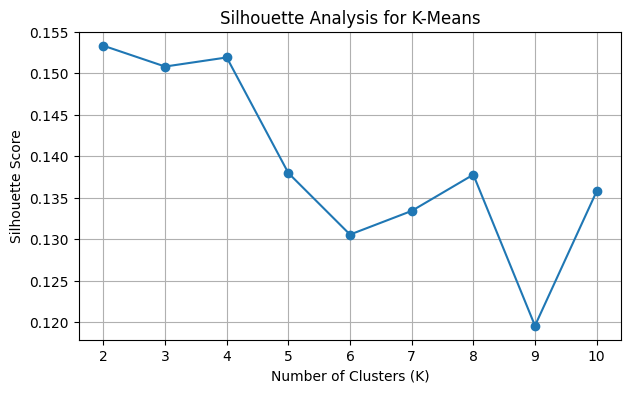

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


data = pd.read_csv("Scaled_dataset.csv")

if "HeartDisease" in data.columns:
    data = data.drop(columns=["HeartDisease"])


X = data.values


k_values = range(2, 11)   # K = 2,3,...,10

silhouette_scores = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

    print(f"K = {k} --> Silhouette Score = {sil_score:.3f}")


results_df = pd.DataFrame({
    "K": list(k_values),
    "Silhouette Score": np.round(silhouette_scores, 3)
})

display(results_df)


best_index = np.argmax(silhouette_scores)
best_k = list(k_values)[best_index]
best_score = silhouette_scores[best_index]

print(f"\n Best K based on Silhouette score: K = {best_k} (Score = {best_score:.3f})")


plt.figure(figsize=(7, 4))
plt.plot(list(k_values), silhouette_scores, marker="o")
plt.xticks(list(k_values))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for K-Means")
plt.grid(True)
plt.show()

According to the Silhouette analysis, the highest average Silhouette score is achieved at 𝐾 = 2, with a score of approximately 0.153, making it the most suitable choice for K-means clustering in this dataset. The next closest score occurs at 𝐾 = 3, which shows a slightly lower Silhouette value but still provides a reasonable clustering structure. By examining both 𝐾 = 2 and 𝐾 = 3, we are able to explore different grouping patterns within the data and compare how the clusters change across configurations, ensuring a more complete understanding of the dataset’s underlying structure.

# Elbow method

The Elbow method is a common approach for selecting an appropriate number of clusters in K-means. It involves plotting the inertia, or the total within-cluster sum of squared distances, against various values of K. Inertia measures how compact the clusters are, and the “elbow” point appears where adding more clusters leads to only minor reductions in inertia. This point suggests a good balance between model simplicity and cluster quality, helping to choose the optimal number of clusters without overfitting.

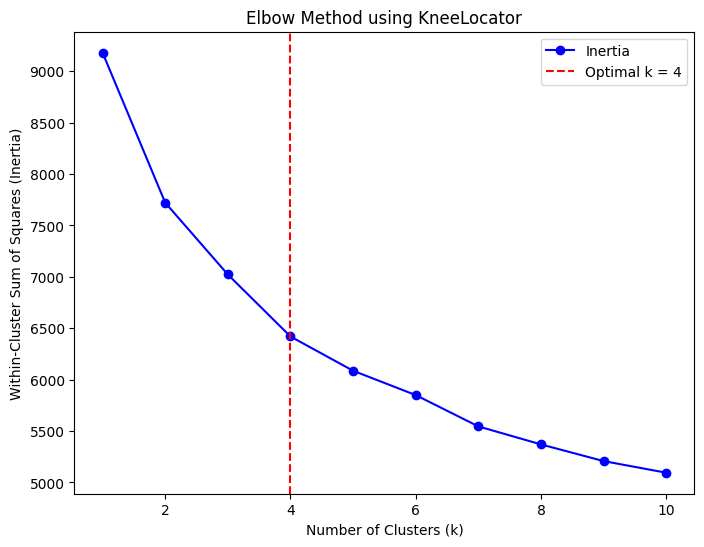

In [ ]:

!pip install kneed

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
import pandas as pd

scaled_data = pd.read_csv("Scaled_dataset.csv")

X = scaled_data.values


cluster_range = np.arange(1, 11)


inertia_values = [
    KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X).inertia_
    for k in cluster_range
]


knee_locator = KneeLocator(cluster_range, inertia_values, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, 'bo-', label='Inertia')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method using KneeLocator')
plt.legend()
plt.show()

From the Elbow curve, we observed another subtle inflection point that suggests a shift in the clustering behavior. This led us to include 𝐾 = 4 as a third configuration to evaluate in our K-means analysis. Incorporating this additional point of curvature allows us to explore a wider variety of cluster formations and gain a more comprehensive understanding of the dataset’s underlying structure.

**K-Means Clustering, Visualization, and Evaluation**

In this section, we apply K-means clustering using three chosen values of 𝐾 and present visualizations of the resulting cluster groups. To assess how well each configuration performs, we calculate evaluation measures such as the Within-Cluster Sum of Squares (WSS) and the average Silhouette score for every selected value of 𝐾. These metrics help us evaluate the overall quality of the clusters and determine how effectively the data has been grouped.

# K2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for consistency
np.random.seed(1234)

# Load the scaled dataset
scaled_data = pd.read_csv('Scaled_dataset.csv')

# Apply K-Means with K=2
kmeans = KMeans(n_clusters=2, random_state=1234, n_init='auto')
kmeans.fit(scaled_data)

# Extract cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Print outputs
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Labels:")
print(labels)

Cluster Centers:
[[-0.19022379  0.28933363 -0.50836986 -0.21333859 -0.06779314  0.23702525
   0.34776634  0.7782298   0.2735813  -0.64062386]
 [ 0.17818431 -0.27102138  0.47619456  0.19983615  0.06350243 -0.22202365
  -0.32575581 -0.72897475 -0.25626603  0.60007804]]

Cluster Labels:
[1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1
 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1
 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0

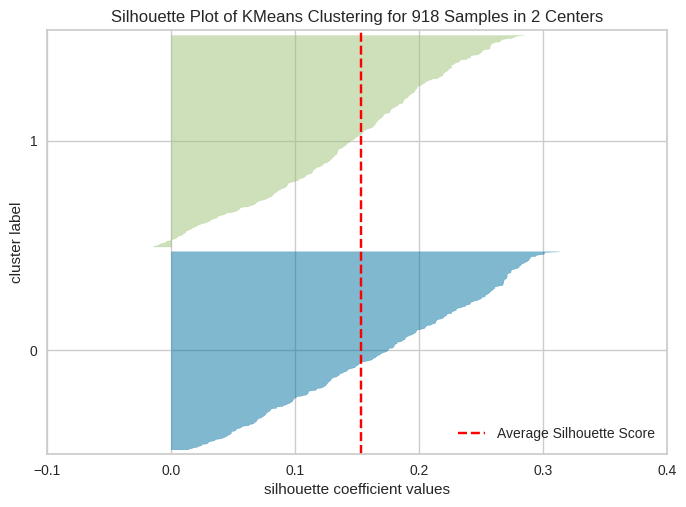

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 918 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, n_init='auto')


visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')


visualizer.fit(scaled_data)


visualizer.show()

The Silhouette plot for the K-Means model with 2 clusters and 918 samples shows that most points have positive Silhouette values, which means they are placed in reasonably appropriate clusters and maintain some level of separation from neighboring groups. This indicates that the algorithm was able to form two clusters, but the separation between them is not particularly strong.

Despite the generally positive scores, the low average Silhouette value of about 0.1988 suggests that the overall cluster structure is weak. This implies that the distinction between the two clusters is not very clear. Several data points—especially those with scores close to zero or negative—likely fall near the boundary between clusters, indicating potential misassignments or overlap in cluster membership.

**Calculating the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X_scaled = scaled_data


kmeans_model = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_model.fit(X_scaled)
cluster_labels = kmeans_model.labels_


wss_value = kmeans_model.inertia_


avg_silhouette = silhouette_score(X_scaled, cluster_labels)


print(f"Within-Cluster Sum of Squares (WSS):" ,wss_value)
print(f"Average Silhouette Score:" , avg_silhouette)

Within-Cluster Sum of Squares (WSS): 7721.169663461516
Average Silhouette Score: 0.1533292513554692


WSS: 7721.1697 – This relatively large WSS value indicates that the clusters are not very compact, meaning the data points within each cluster are still quite spread out.

Average Silhouette Score: 0.153 – This low Silhouette score suggests that the clustering structure is weak, with limited separation between clusters and possible overlap or uncertainty in how some points are assigned.

# K3

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_data)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 0.32472627 -0.39082251  0.51624625  0.09183283  0.0221469  -0.23064985
  -1.13646952 -0.65776898 -0.15239334  0.53810141]
 [-0.07988596  0.04476221  0.1453499   0.26652926  0.07009193 -0.01209859
   0.83775401 -0.75019541 -0.3684001   0.37305873]
 [-0.20327818  0.27909407 -0.50571077 -0.2512681  -0.06449415  0.19052642
   0.33731905  1.02303138  0.36744252 -0.67561554]]

Cluster Labels:
[0 0 0 2 1 0 0 1 2 0 1 2 1 2 1 1 0 0 1 0 1 1 0 2 1 0 2 1 1 1 1 1 2 1 0 0 2
 1 1 2 1 2 0 0 2 2 0 0 0 0 2 2 1 1 2 0 2 1 1 2 0 0 1 2 1 1 1 0 2 0 2 1 1 0
 2 0 1 1 1 0 0 0 1 0 2 2 2 2 0 2 0 1 1 2 0 2 1 0 1 1 2 1 1 2 1 1 0 0 1 0 0
 2 2 1 1 1 0 2 0 0 0 1 1 2 1 1 0 0 1 0 1 2 2 2 2 0 0 1 2 2 2 2 2 0 1 1 0 0
 0 2 0 1 1 1 0 2 2 1 2 1 2 2 0 1 1 0 2 0 1 0 0 0 0 0 2 2 2 1 1 0 2 1 2 2 1
 1 1 2 2 2 0 0 0 0 0 0 1 1 2 0 1 1 1 1 1 2 0 1 0 1 1 2 1 0 2 0 1 1 1 0 1 2
 0 0 1 1 1 2 0 0 0 0 1 1 1 0 2 1 2 2 0 2 2 0 2 1 2 2 2 2 1 1 2 0 2 1 1 0 0
 0 0 1 2 1 1 0 2 1 2 1 1 0 2 1 0 0 1 2 2 0 1 2 0 0 0 0 1 1 0 0 1 

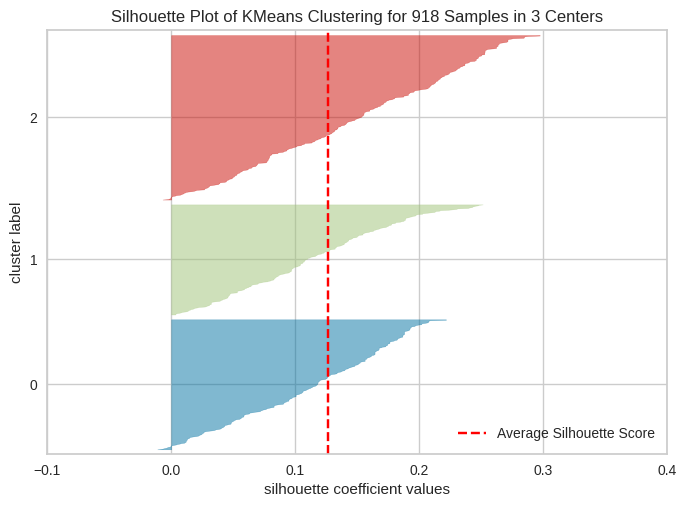

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 918 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=3, n_init='auto')


visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')


visualizer.fit(scaled_data)


visualizer.show()

The Silhouette plot for K-Means clustering with 3 clusters shows that a large portion of the data points have positive silhouette values, meaning many samples fit reasonably well within their assigned clusters. This indicates that the clustering achieves a moderate level of separation between groups.

However, the plot also shows several points with silhouette scores close to zero and a noticeable number dipping below zero, especially within the blue and green clusters. These negative or near-zero values suggest that some samples may be assigned to the wrong cluster or are positioned very close to the boundary between clusters. This reflects overlap and weaker separation compared to an ideal clustering structure.

**Calculating the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X_scaled = scaled_data


kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_model.fit(X_scaled)
cluster_labels = kmeans_model.labels_


wss_value = kmeans_model.inertia_


avg_silhouette = silhouette_score(X_scaled, cluster_labels)


print(f"Within-Cluster Sum of Squares (WSS):" ,wss_value)
print(f"Average Silhouette Score:" , avg_silhouette)

Within-Cluster Sum of Squares (WSS): 7022.671726620137
Average Silhouette Score: 0.15081888430228127


The K-Means model with 3 clusters produced a WSS of 7022.67 and an average Silhouette score of 0.1508. These results indicate that the clusters have only limited compactness and separation. The low silhouette value suggests that the overall cluster structure is weak, with noticeable overlap or uncertainty in how some points are assigned. This means the clustering could potentially be improved by trying different values of K or considering other clustering approaches.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=4
kmeans = KMeans(n_clusters=4, random_state=8953, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(scaled_data)

#Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[ 4.02888953e-01 -4.90618452e-01  5.06882981e-01  1.63785085e-01
   1.33742797e-03 -4.40477288e-01 -1.15093060e+00 -6.88233482e-01
  -1.92652632e-01  5.94998074e-01]
 [-3.33517206e-01  3.16633380e-01 -2.32918956e-01 -2.29282360e-01
  -1.73594077e-02  1.81375843e+00  1.68145421e-01  1.90172802e-01
   2.98565337e-02 -4.20382542e-01]
 [-1.40587149e-01  2.53011455e-01 -5.21865902e-01 -2.21582337e-01
  -7.75899284e-02 -5.51341340e-01  3.11427321e-01  9.74076510e-01
   4.20951460e-01 -6.37282927e-01]
 [ 1.04201058e-02 -4.11981611e-02  3.36461858e-01  3.52879447e-01
   1.34068117e-01 -4.87419724e-01  9.42237498e-01 -7.24419964e-01
  -4.02319308e-01  5.88838235e-01]]

Cluster Labels:
[0 0 0 2 3 0 0 3 2 0 3 2 3 2 3 3 0 0 3 0 3 3 0 2 3 0 2 3 3 3 3 3 2 2 0 0 1
 3 3 2 3 2 0 0 2 2 0 0 0 0 2 2 1 3 2 0 2 3 3 2 0 0 3 2 3 3 3 0 2 0 2 3 3 0
 2 0 3 3 3 0 0 0 2 0 1 2 1 2 0 2 0 3 3 2 0 2 3 0 3 3 2 3 2 1 3 1 0 0 3 0 0
 2 1 3 3 3 0 1 0 0 0 3 3 2 3 3 0 0 3 0 3 2 2 2 2 0 0 3 2 2 2 2 2 0 3 3 0

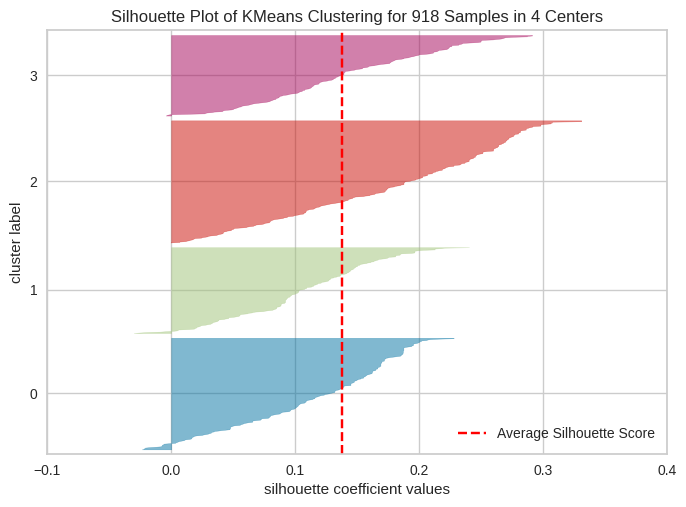

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 918 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=4, n_init='auto')


visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')


visualizer.fit(scaled_data)


visualizer.show()

The Silhouette plot for K-Means clustering with 4 centers shows that the majority of points have positive silhouette values, indicating that many samples fit reasonably well within their assigned clusters and maintain some degree of separation from neighboring ones. This suggests that the clustering captures some underlying structure in the data.

Still, the average silhouette score is relatively low, and the plot includes several points with values close to zero or negative. This indicates that a noticeable portion of the data lies near the boundaries between clusters or may be more similar to points in other groups. As a result, the overall clustering quality is modest—while not ineffective, the separation between clusters is not particularly strong or well-defined.

**Calculating the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X_scaled = scaled_data

# Perform KMeans clustering with k=4 clusters
kmeans_model = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_model.fit(X_scaled)
cluster_labels = kmeans_model.labels_

# Calculate WSS
wss_value = kmeans_model.inertia_

# Compute the Silhouette Score for the clusters
avg_silhouette = silhouette_score(X_scaled, cluster_labels)

# Output the WSS and the Silhouette Score
print(f"Within-Cluster Sum of Squares (WSS):" ,wss_value)
print(f"Average Silhouette Score:" , avg_silhouette)

Within-Cluster Sum of Squares (WSS): 6419.6457675882275
Average Silhouette Score: 0.1519155021689736


The K-Means model with 4 clusters produced a WSS of 6419.65 and an average Silhouette score of 0.1519. While the WSS value indicates that the clusters have become slightly more compact compared to higher values, the low silhouette score shows that the overall cluster separation remains weak. This means that although the data is grouped into four clusters, the boundaries between them are not very distinct, and some overlap or ambiguity is still present. Additional adjustments to the number of clusters or the use of alternative clustering algorithms may be needed to achieve clearer group separation.

1. WSS: 7257.779, Silhouette Score: 0.199

Explanation: This setup has the highest silhouette score, meaning the clusters are more clearly separated from each other. However, the high WSS shows that the clusters are not very compact and are more spread out.

2. WSS: 6576.07, Silhouette Score: 0.186

Explanation: This option has a lower WSS than the first one, meaning the clusters are a bit tighter. But the silhouette score is also lower, which means the clusters are not as well separated.

3. WSS: 5968.30, Silhouette Score: 0.176

Explanation: This setup gives the tightest clusters, as shown by the lowest WSS. Still, it has the lowest silhouette score, which suggests the clusters are not clearly separated.

Conclusion:

The first configuration offers the best trade-off. While its clusters are less compact, the higher silhouette score means the groups are more clearly defined. This makes it the most suitable choice for meaningful clustering results.

Final Choice – Summary of Results

After comparing the clustering performance across the three configurations, using both the Within-Cluster Sum of Squares (WSS) and the average Silhouette score, K = 2 emerges as the most suitable option. Although it has the highest WSS—which is expected since WSS naturally decreases as the number of clusters increases—it also provides the highest Silhouette score out of all tested values. This indicates that the cluster separation at K = 2 is slightly stronger and that the grouping structure is more distinct compared to K = 3 and K = 4, whose Silhouette scores are even lower.

Despite the compactness improving as K increases, the separation between clusters does not. Therefore, K = 2 offers the best overall balance, making it the preferred configuration for interpreting meaningful cluster patterns in the dataset.